<h1 style="color:green;"> LEAD SCORING PROJECT

## PROBLEM STATEMENT

<p><i>X Education, an online education company, faces challenges in converting leads into paying customers despite generating a significant number of leads daily. With a conversion rate of only 30%, the company aims to improve its lead identification process to target potential customers more effectively. They seek to develop a model that assigns lead scores to prioritize leads based on their likelihood of conversion, ultimately aiming for an 80% conversion rate.</p></i>


### Data Scenario Categorization:

> - The dataset provided contains approximately **9000** data points, including attributes like Lead Source, Total Time Spent on Website, Total Visits, and Last Activity. 
> - The target variable, **'Converted'**, indicates whether a lead was converted **(1)** or not **(0)**. 
> - The dataset also includes categorical variables with levels such as **'Select'**, which need handling as they are equivalent to null values.

### Objectives:
1. Build a logistic regression model to assign lead scores ranging from 0 to 100 to each lead, aiding the company in targeting potential customers effectively. Higher scores indicate hotter leads with a higher likelihood of conversion, while lower scores represent colder leads less likely to convert.
2. Ensure the model's adaptability to accommodate potential changes in the company's requirements in the future, addressing any additional problems or challenges that may arise.

**IMPORTING THE REQUIRED LIBRARIES**

In [1]:
# Importing the required libraries - NumPy, Pandas, Matplotlib and Seaborn

# Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

In [2]:
# Extra
import warnings
warnings.filterwarnings(action='ignore')

<h1 style="color:green;"> Step 1: Importing Data and inspecting the Dataframe


In [3]:
leads= pd.read_csv('Leads.csv')

In [4]:
# Let's see the head of our master database
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

This dataset has - 
- 9240 rows
- 37 columns

In [6]:
# Look at the specifics of the data frame
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Numerical statistics of the dataframe
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

<h1 style="color:green;"> Step 2: Data Exploration

<h3 style="color:blue;"> Checking for missing values </h3>

In [8]:
# Checking for null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Checking the percentage of null values and sorting them in descending order.
round((100 * leads.isnull().mean()).sort_values(ascending=False),2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Deleting the columns which are having null values more than 40% as they hinder the analysis.

In [10]:
# Checking columns with null value percentages exceeding 40% and storing them in a variable named 'cols_to_drop
cols_to_drop = leads.columns[100 * leads.isnull().mean() > 40]
cols_to_drop

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [11]:
# These columns are advised to drop from the dataframe for better analysis.
leads= leads.drop(cols_to_drop, axis = 1)

In [12]:
# Looking at the specifics of the dataframe after dropping
leads.shape

(9240, 32)

In [13]:
# Check for the value 'Select' in the DataFrame
result = leads.isin(['Select']).any()

# Boolean indexing to display only True values
true_values = result[result].index.tolist()
print(true_values)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [14]:
# Sorting the remaining null values in the DataFrame and then display the first 15 columns in percentage
round((100 * leads.isnull().mean()).sort_values(ascending=False).head(15),2)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
dtype: float64

### Plotting a Count Plot for all the Null value columns

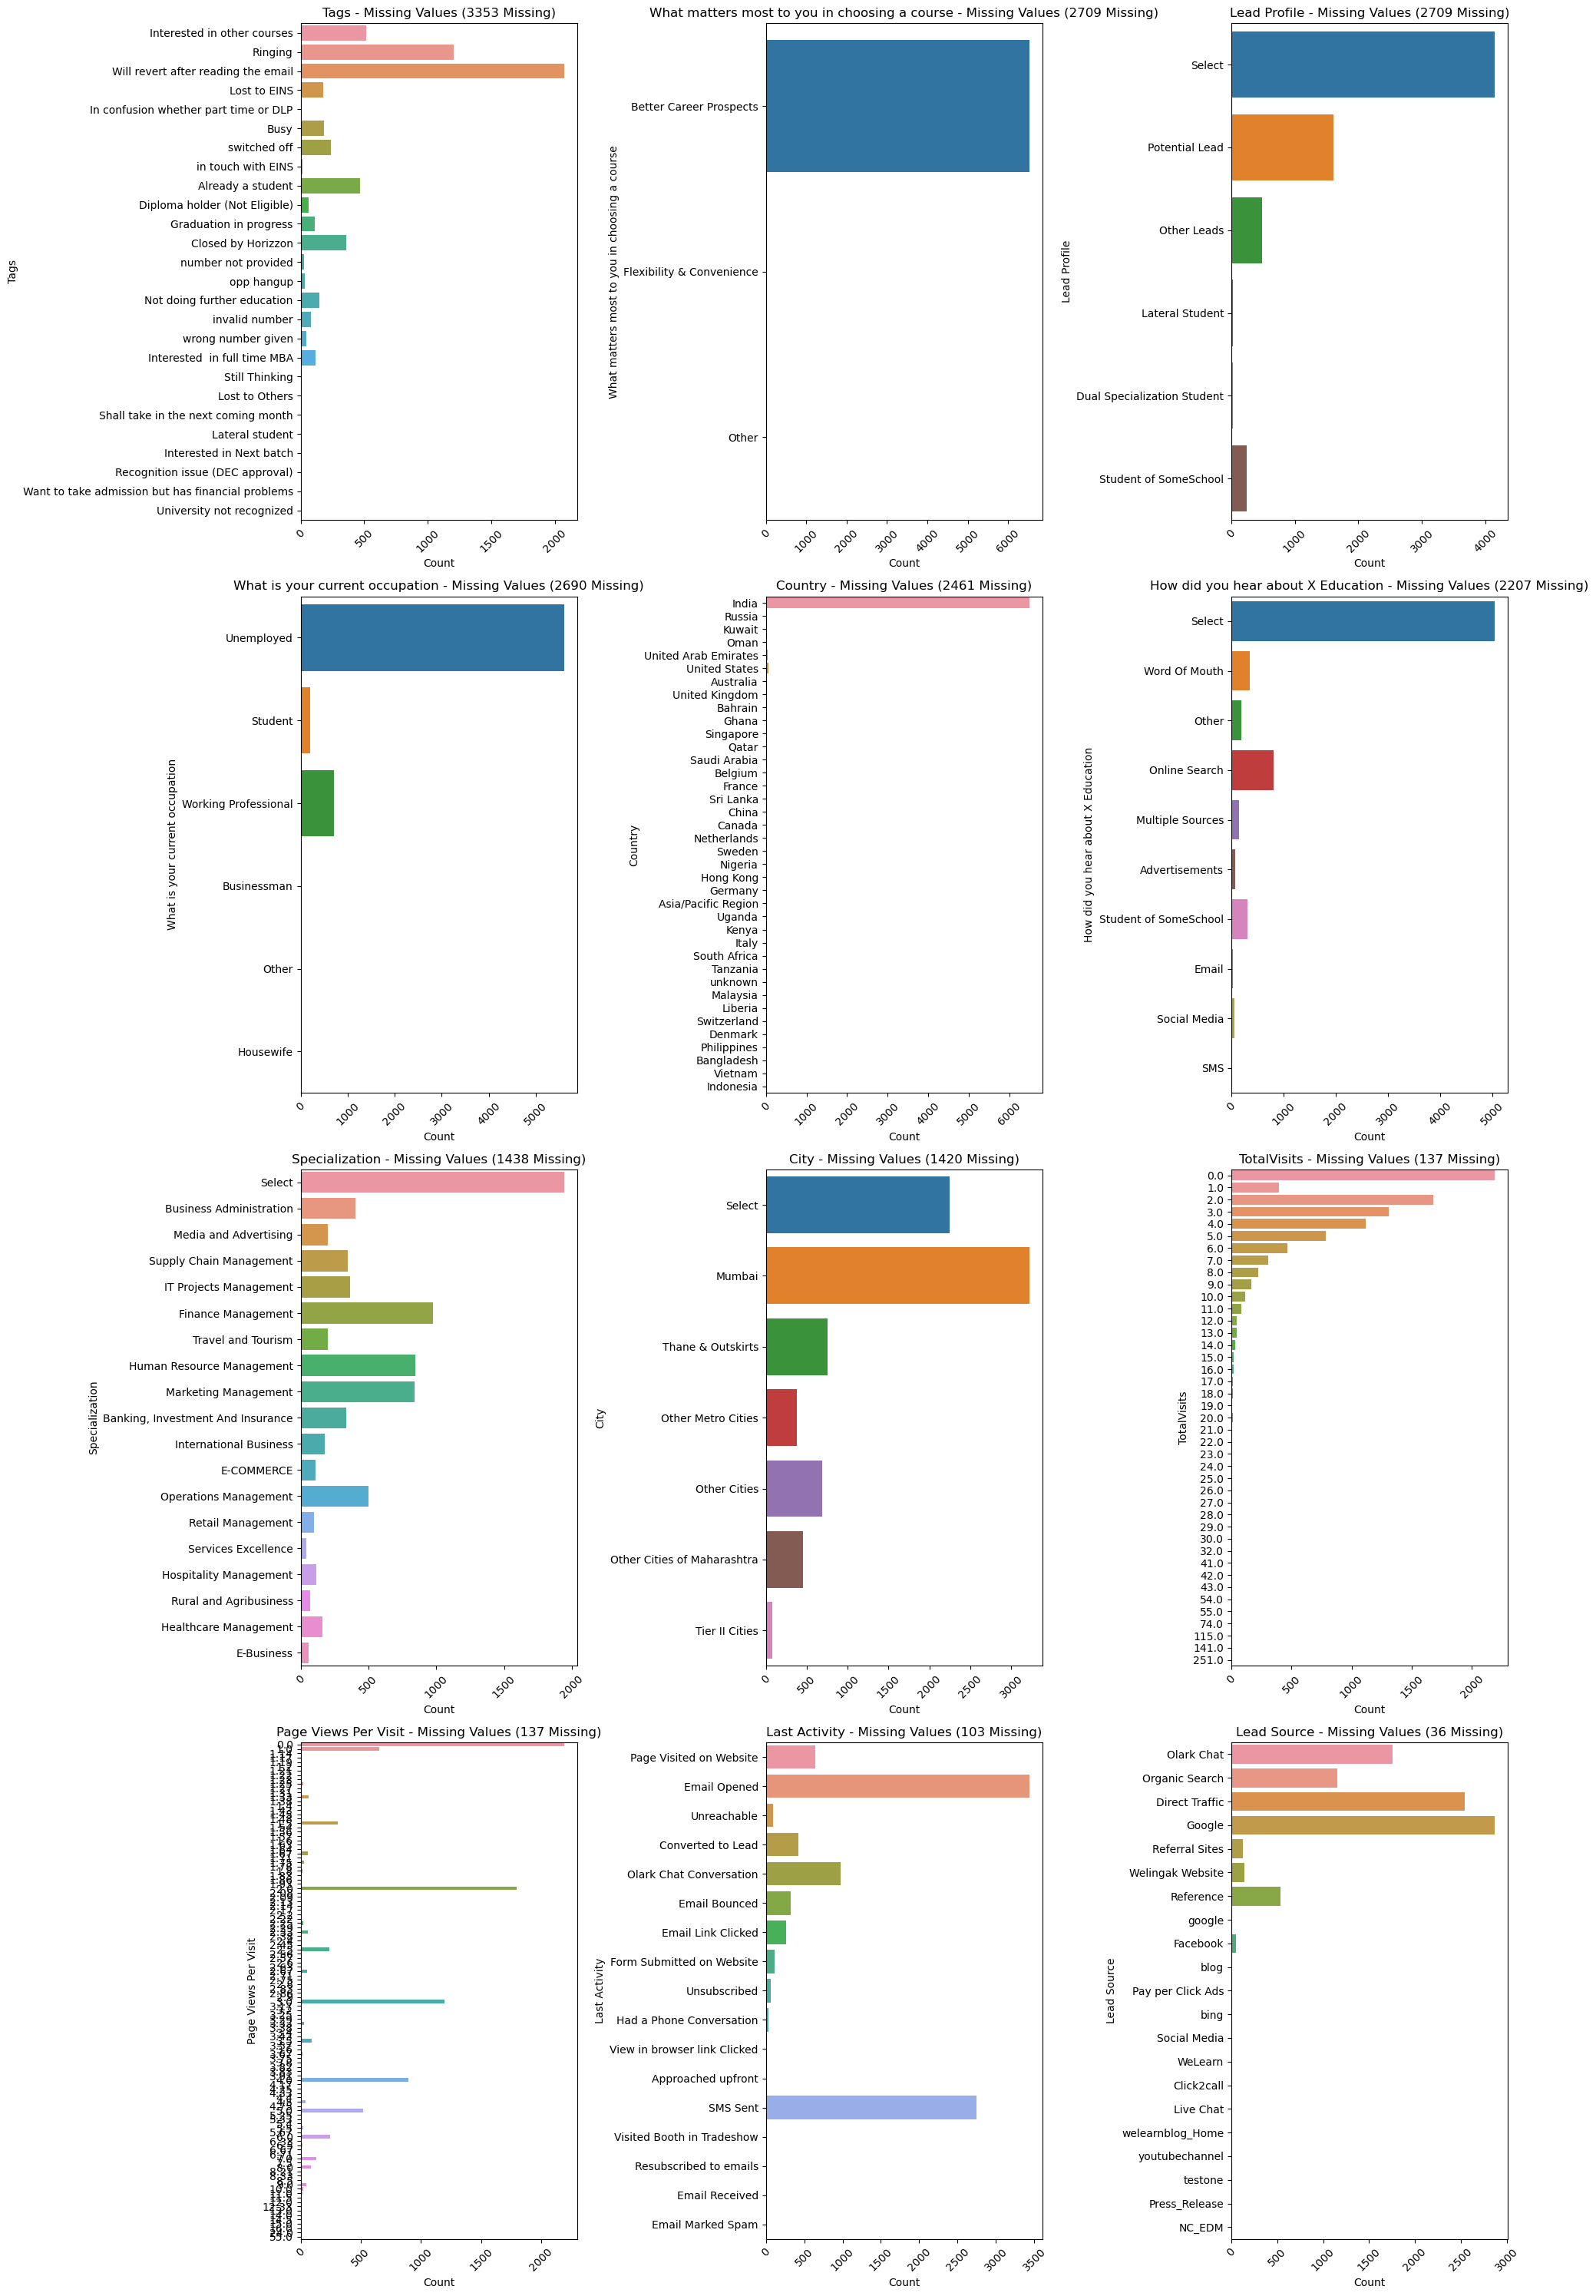

In [15]:
# Filter columns with null values
null_cols = leads.columns[leads.isnull().any()].tolist()

# Calculate the count of missing values for each column
missing_counts = leads[null_cols].isnull().sum().sort_values(ascending=False)

# Define the size of the subplot
plt.figure(figsize=(20, 30))

# Create subplots for each column in descending order of missing value counts
for index, (column, missing_count) in enumerate(missing_counts.items(), 1):
    plt.subplot(4, 3, index)
    sns.countplot(y=leads[column])
    plt.title(f'{column} - Missing Values ({missing_count} Missing)')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

There are 12 columns with null values, and one column has a negligible null value percentage of 0.39% with 36 values.There are 3 columns with the value 'Select' which needs to be handled. Let's delve deeper into these columns.

<h3 style="color:blue;"> Tags - Missing Values</h3>

<span style="color:blue;"> 
    `~36%` of entries for `Tags` are missing. Let's see what the `Tags` variable looks like in general.</span>

In [16]:
# Access the 'Tags' column of the DataFrame and count the occurrences of each unique value including NaN values
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Given that there are over 3000 null values, to prevent data loss, replacing the null values with `'Not Specified'`.

In [17]:
# Replacing the null values with 'Not Specified'
leads['Tags'] = leads['Tags'].fillna('Not Specified')

In [18]:
# Computing the % of remaining null values for each column ,sort them in descending order & display the top 12 columns
round((100 * leads.isnull().mean()).sort_values(ascending=False). head(12),2)

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
dtype: float64

<h3 style="color:blue;"> Lead Profile - Missing Values

<span style="color:blue;">`~29%` of entries for `Lead Profile` are missing. Let's see what the `Lead Profile` variable looks like in general.</span>

In [19]:
leads['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

It is seen that value `Select` is having more count. This value typically indicates that the lead profile has not been selected or specified yet. It might be a placeholder or default value. So it is almost like the null value. So when added together, it will have null values more than `70%`. So it is safe to delete the column.

In [20]:
# Dropping the column 'Lead Profile'
leads = leads.drop(['Lead Profile'], axis=1)

In [21]:
#  Sorting the remaining null values in the DataFrame and then display the first 12 columns in percentage
round((100 * leads.isnull().mean()).sort_values(ascending=False). head(12),2)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Update me on Supply Chain Content                 0.00
Newspaper                                         0.00
dtype: float64

<h3 style="color:blue;"> 'What matters most to you in choosing a course' - Missing Values

<span style="color:blue;"> `~29%` of entries for `What matters most to you in choosing a course` are missing. Let's see what this variable looks like in general.</span>

In [22]:
# To see the unique values present in the column
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

It is seen that the leads have visited this website for `Better Career Prospects`. There are more number of null values when compared to the other. So it is safe to impute as `'Not Specified'` instead of deleting those rows.

In [23]:
# Replacing the null values with 'Not Specified'
leads['What matters most to you in choosing a course']= leads['What matters most to you in choosing a course'].fillna('Not Specified')

# Sorting the remaining null values in the DataFrame and then display the first 12 columns in percentage
round((100 * leads.isnull().mean()).sort_values(ascending=False).head(12),2)

What is your current occupation           29.11
Country                                   26.63
How did you hear about X Education        23.89
Specialization                            15.56
City                                      15.37
Page Views Per Visit                       1.48
TotalVisits                                1.48
Last Activity                              1.11
Lead Source                                0.39
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Tags                                       0.00
dtype: float64

<h3 style="color:blue;"> What is your current occupation - Missing Values

<span style="color:blue;"> `~29%` of entries for `What is your current occupation` are missing. Let's see what this variable looks like in general.</span>

In [24]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In this column, it is seen that the `Unemployed` are the highest in count who have been searching these courses but also we see that the null values are also the second highest in number which if deleted, we'll lose much data. So it's better to impute them with the varaiable `'Not Specified'`.

In [25]:
leads['What is your current occupation']= leads['What is your current occupation'].fillna('Not Specified')

# Sorting the remaining null values in the DataFrame and then display the first 10 columns in percentage
round((100 * leads.isnull().mean()).sort_values(ascending=False).head(10),2)

Country                               26.63
How did you hear about X Education    23.89
Specialization                        15.56
City                                  15.37
Page Views Per Visit                   1.48
TotalVisits                            1.48
Last Activity                          1.11
Lead Source                            0.39
Digital Advertisement                  0.00
Through Recommendations                0.00
dtype: float64

Before going through the `Country` variable, let's go through the `City` variable which has lesser null values and would help in dealing with the `Country` variable.

<h3 style="color:blue;"> City - Missing Values

<span style="color:blue;"> There are around `~15%` of null values in `City`. Let's see how the variable looks like.</span>

In [26]:
# Calculating the percentage distribution of values in the 'City' column (including NaN values) 
round(100 * (leads['City'].value_counts(dropna=False)/leads.shape[0]),2) 

Mumbai                         34.87
Select                         24.34
NaN                            15.37
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

- Given that the majority of customers are either from `Mumbai` (34%) or represented by `'Select'` and `NaN` values combined (39%), surpassing `Mumbai` individually, and considering the relatively low percentages of other cities, it appears that the city variable holds minimal significance for analysis, especially considering that X company offers online courses. 
- Therefore, it's advisable to drop this variable from the analysis.

In [27]:
# Dropping the column 'City'
leads=leads.drop(['City'], axis=1)

# Sorting the remaining null values in the DataFrame and then display the first 10 columns in percentage
(100 * leads.isnull().mean()).sort_values(ascending=False).head(10)

Country                                   26.634199
How did you hear about X Education        23.885281
Specialization                            15.562771
Page Views Per Visit                       1.482684
TotalVisits                                1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Digital Advertisement                      0.000000
Through Recommendations                    0.000000
Receive More Updates About Our Courses     0.000000
dtype: float64

<h3 style="color:blue;">Country - Missing Values

<span style="color:blue;"> The 'Country columns has `~27%` of the missing values. So let's look into the variable and what it looks like.</span>

In [28]:
# Displaying the values to get an overview of the data present in this variable.
print(leads['Country'].value_counts(dropna=False))

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

- As it is seen in the values above, there are customers from multiple countries, and as seen earlier in the `City` variable, the cities of that particular country was not mentioned other than major city 'Mumbai'. So in order to not to lose data, it is safe to impute null values with the mode of the column, i.e. `'India'`
- Also it is good to club lower frequency values for analysis.

In [29]:
# filling the null values
leads['Country'].fillna(leads['Country'].mode()[0], inplace=True)

In [30]:
# Replace lower frequency values with 'Other'
lower_freq_countries = leads['Country'].value_counts()[leads['Country'].value_counts() < 7].index.tolist()
leads['Country'] = leads['Country'].apply(lambda x: 'Others' if x in lower_freq_countries else x)

In [31]:
leads['Country'].value_counts()

India                   8953
United States             69
Others                    68
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Name: Country, dtype: int64

In [32]:
# Sorting the remaining null values in the DataFrame and then display the first 10 columns in percentage
round((100 * leads.isnull().mean()).sort_values(ascending=False).head(10),2)

How did you hear about X Education        23.89
Specialization                            15.56
Page Views Per Visit                       1.48
TotalVisits                                1.48
Last Activity                              1.11
Lead Source                                0.39
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
dtype: float64

<h3 style="color:blue;">How did you hear about X Education - Missing Values

<span style="color:blue;"> There are about `~24%` of null values in this column. Let's see how this variable looks like.</span>

In [33]:
# Determine the distribution of values within this variable as a percentage
round((leads['How did you hear about X Education'].value_counts(dropna=False)/leads.shape[0])*100,2)

Select                   54.58
NaN                      23.89
Online Search             8.74
Word Of Mouth             3.77
Student of SomeSchool     3.35
Other                     2.01
Multiple Sources          1.65
Advertisements            0.76
Social Media              0.73
Email                     0.28
SMS                       0.25
Name: How did you hear about X Education, dtype: float64

- It is seen that the value `Select` is having more than 50% of the values and it likely represents cases where the source from which the customer heard about X Education has not been specified. 
- So this value does not give any specific information about the customer.
- Even the null values are also around 24%, which altogether constitute 74% of the values in this variable. 
- So it is advised to drop this column for analysis.

In [34]:
# Dropping the column
leads = leads.drop(['How did you hear about X Education'], axis=1)

# Sorting the remaining null values in the DataFrame and then display the first 10 columns in percentage
round((100 * leads.isnull().mean()).sort_values(ascending=False).head(10),2)

Specialization                            15.56
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Prospect ID                                0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
dtype: float64

<h3 style="color:blue;"> Specialization - Missing Values

<span style="color:blue;">  There are about `~16%` of null values in this column. Let's see how this variable looks like.

In [35]:
# Value counts
leads['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [36]:
# Determine the distribution of values within this variable as a percentage
round((leads['Specialization'].value_counts(dropna=False)/leads.shape[0]) * 100, 2)

Select                               21.02
NaN                                  15.56
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

- Given that approximately 36% of the data comprises a combination of `'Select'` and `'NaN'` values, it is recommended to replace both occurrences with `'Not Specified'` for analysis purposes.

In [37]:
# Replacing the null values with 'Not Specified'
leads['Specialization'] = leads['Specialization'].fillna('Not Specified')

# Replacing the 'Select' value with 'Not Specified'
leads['Specialization'] = leads['Specialization'].replace('Select','Not Specified')

# Examining the values again after replacing
leads['Specialization'].value_counts()

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [38]:
# Sorting the remaining null values in the DataFrame and then display the first 10 columns in percentage
round((100 * leads.isnull().mean()).sort_values(ascending=False).head(10),2)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
Newspaper Article                           0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
dtype: float64

Now, let's examine the last four remaining columns with null values, each having a very low percentage of approximately 1% to 2%.

<h3 style="color:blue;">'TotalVisits' and 'Page Views Per Visit' - Missing Values

<span style="color:blue;">  There are about `1.48%` of null values in these columns. They are the numeric coulmns. Let's plot a histogram and see how these variables are distributed.

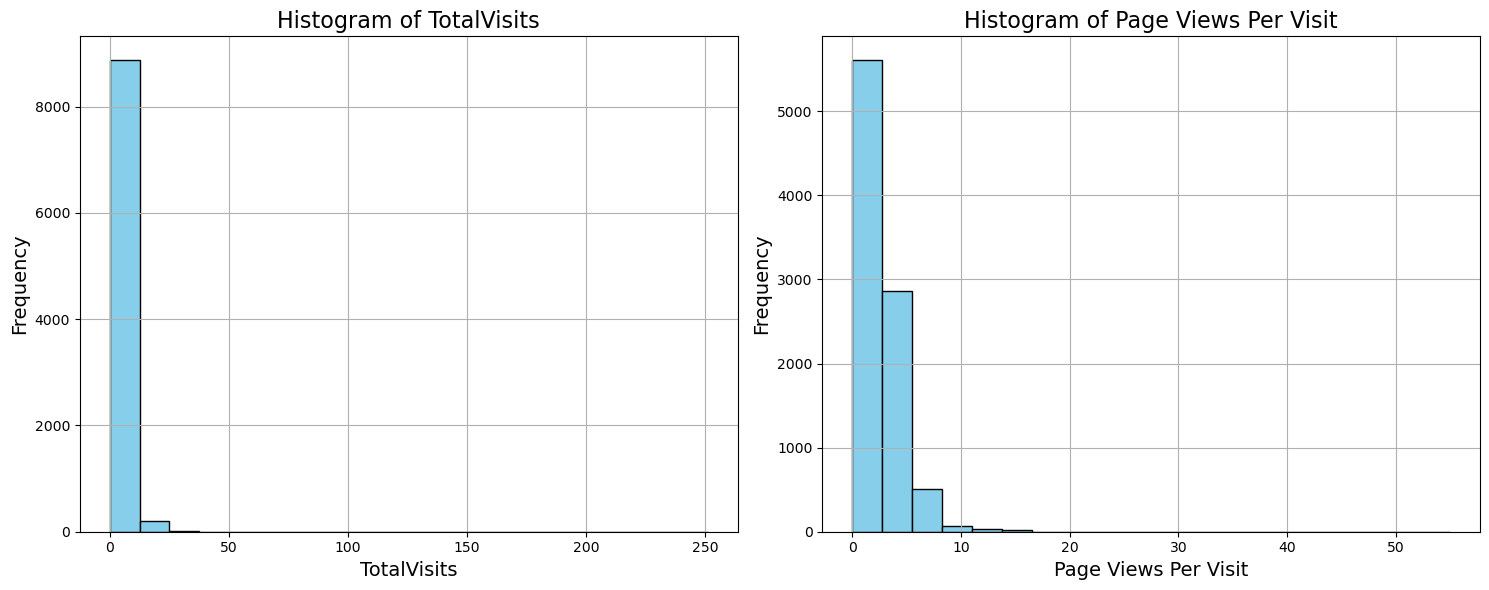

In [39]:
# Create subplots with one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram of 'TotalVisits' in the first subplot
axs[0].hist(leads['TotalVisits'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of TotalVisits', fontsize=16)
axs[0].set_xlabel('TotalVisits', fontsize=14)
axs[0].set_ylabel('Frequency', fontsize=14)
axs[0].grid(True)

# Plot histogram of 'Page Views Per Visit' in the second subplot
axs[1].hist(leads['Page Views Per Visit'], bins=20, color='skyblue', edgecolor='black')
axs[1].set_title('Histogram of Page Views Per Visit', fontsize=16)
axs[1].set_xlabel('Page Views Per Visit', fontsize=14)
axs[1].set_ylabel('Frequency', fontsize=14)
axs[1].grid(True)

plt.tight_layout()
plt.show()

- It appears that most websites have received less than 50 visits in the time period measured. 
- It appears that most visits have 10 or fewer page views.
- Removing all the rows containing NaN values as it is less than 2%, it will have negligible impact on the model.

<h3 style="color:blue;"> 'Last Activity' - Missing Values

<span style="color:blue;">  There are about `1.11%` of null values in this column. It is a categorical column. Let's see how this variable looks like.

In [40]:
# Determine the distribution of values within this variable as a percentage
round(100 * leads['Last Activity'].value_counts(dropna=False)/leads.shape[0],2)

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
NaN                              1.11
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

Removing all the rows containing NaN values as it is less than 2%, it will have negligible impact on the model.

<h3 style="color:blue;"> 'Lead Source' - Missing Values

<span style="color:blue;">  There are about `0.39%` of null values in this categorical column. Let's see how this variable looks like.

In [41]:
# Determine the distribution of values within this variable as a percentage
round(100 * leads['Lead Source'].value_counts(dropna = False)/leads.shape[0],2)

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
NaN                   0.39
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

Removing all the rows containing NaN values as it is less than 1%, it will have negligible impact on the model.

Therefore the above four key variables have negligible null values, ranging from approximately `1%` to `2%`. Hence, for analysis purposes, it is advisable to eliminate rows containing these null value rows.

In [42]:
# Store the columns containing remaining null values in a variable named 'columns_with_null'.
columns_with_null = ['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source']

# Drop rows with null values from the specified columns
leads.dropna(subset=columns_with_null, inplace=True)

In [43]:
# Confirming that all null values are equal to zero.
leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [44]:
# Verifying if any value in the DataFrame is still remaining with the 'Select' variable

result = leads.isin(['Select']).any()

# Boolean indexing to display only True values
true_values = result[result].index.tolist()
print(true_values)

[]


So the `Select` variable is handled in all the columns of the dataset.

In [45]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [46]:
leads.shape

(9074, 29)

Now the dataset contains:
 - 9074 rows
 - 29 columns 
    <br><br> 
So this final dataframe contains no null values which can be used for Exploratory Data Analysis. <br><br>

<h1><u><font color='blue'>Data imbalance</h1></u><br>

The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. 

- By analyzing the relationship between the target variable and other features in the dataset, you can identify which factors have the most significant impact on lead conversion. This insight can help prioritize efforts and resources towards optimizing those factors.<br>
- Analyzing the predictions and insights generated by the model can provide valuable business insights. It helps identify key drivers of lead conversion, understand customer behavior, and inform strategic decision-making processes.

In [47]:
leads['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [48]:
# Percentage of Converted and Non-Converted leads
round(100 * (leads['Converted'].value_counts()/leads.shape[0]),2)

0    62.14
1    37.86
Name: Converted, dtype: float64

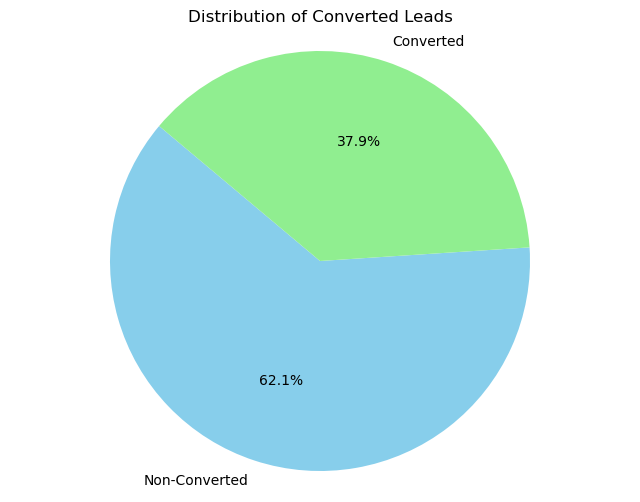

In [49]:
# Data for the pie chart
converted_counts = leads['Converted'].value_counts()
labels=('Non-Converted', 'Converted')
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(converted_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Converted Leads')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

As the target feature Converted value count indicates a good distribution of conversion(1) & non conversion(0). So, it is concluded that data is not highly imbalanced.

In [50]:
# leads seperated based on conversion 
converted_leads = leads[leads['Converted']==1] 
non_converted_leads = leads[leads['Converted']==0] 

In [51]:
print('The number of converted leads are',converted_leads.shape)
print('The number of non converted leads are',non_converted_leads.shape)

The number of converted leads are (3435, 29)
The number of non converted leads are (5639, 29)


In [52]:
# numerical variables
numeric_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# categorical variables
categorical_vars = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                    'What is your current occupation', 'What matters most to you in choosing a course', 
                    'A free copy of Mastering The Interview','Tags', 'Last Notable Activity']

<h1 style="color:green;">Step 3: Exploratory Data Analysis

<h3 style="color:#B7410E;"> 3.1. UNIVARIATE ANALYSIS

In [53]:
numeric_vars

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

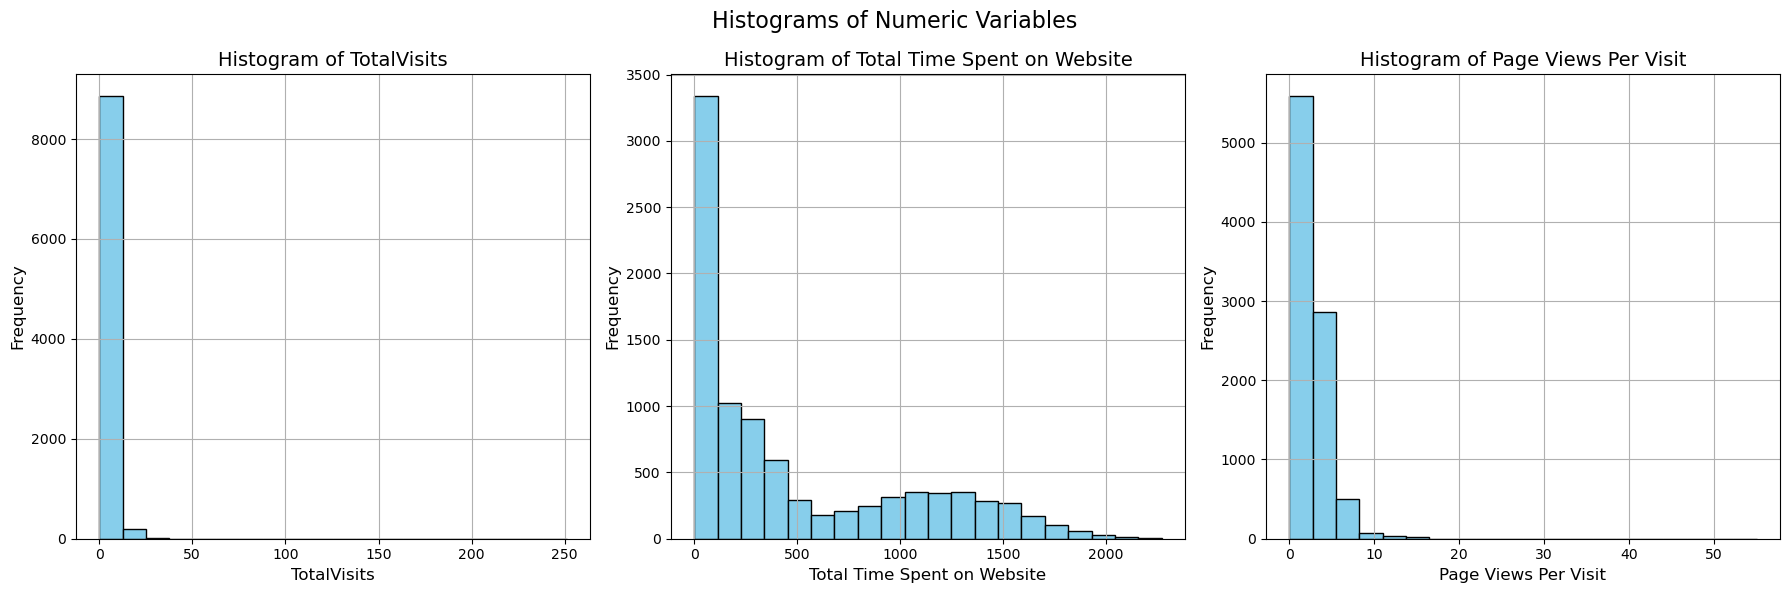

In [54]:
# Create histograms for numeric variables using subplots
fig, axs = plt.subplots(1, len(numeric_vars), figsize=(18, 6))

for i, var in enumerate(numeric_vars):
    axs[i].hist(leads[var], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(var, fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].set_title(f'Histogram of {var}', fontsize=14)
    axs[i].grid(True)

plt.suptitle('Histograms of Numeric Variables', fontsize=16)
plt.tight_layout()
plt.show()


**Inference** -

- The histogram labeled "Total Visits" appears to be right-skewed, with more frequent visits in the lower range and a tail extending towards higher numbers of visits. This suggests that most visits are short, but there are a few visits that last much longer. It appears that most websites have received less than 50 visits in the time period measured.<br><br>

- The histogram labeled "Total Time Spent on Website" is also appears to be right-skewed, with more visits concentrated in the lower range of time spent on the website. It appears that most visits last less than 500 seconds (8 minutes and 20 seconds). <br><br>

- The histogram labeled "Page Views per Visit" appears to be possibly normally distributed, with more visits having a medium number of page views and fewer visits having an  exceptionally high or low number of page views. It appears that most visits have less than 8 or fewer page views.<br><br>

##### Bar charts for categorical variables

In [55]:
categorical_vars

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'A free copy of Mastering The Interview',
 'Tags',
 'Last Notable Activity']

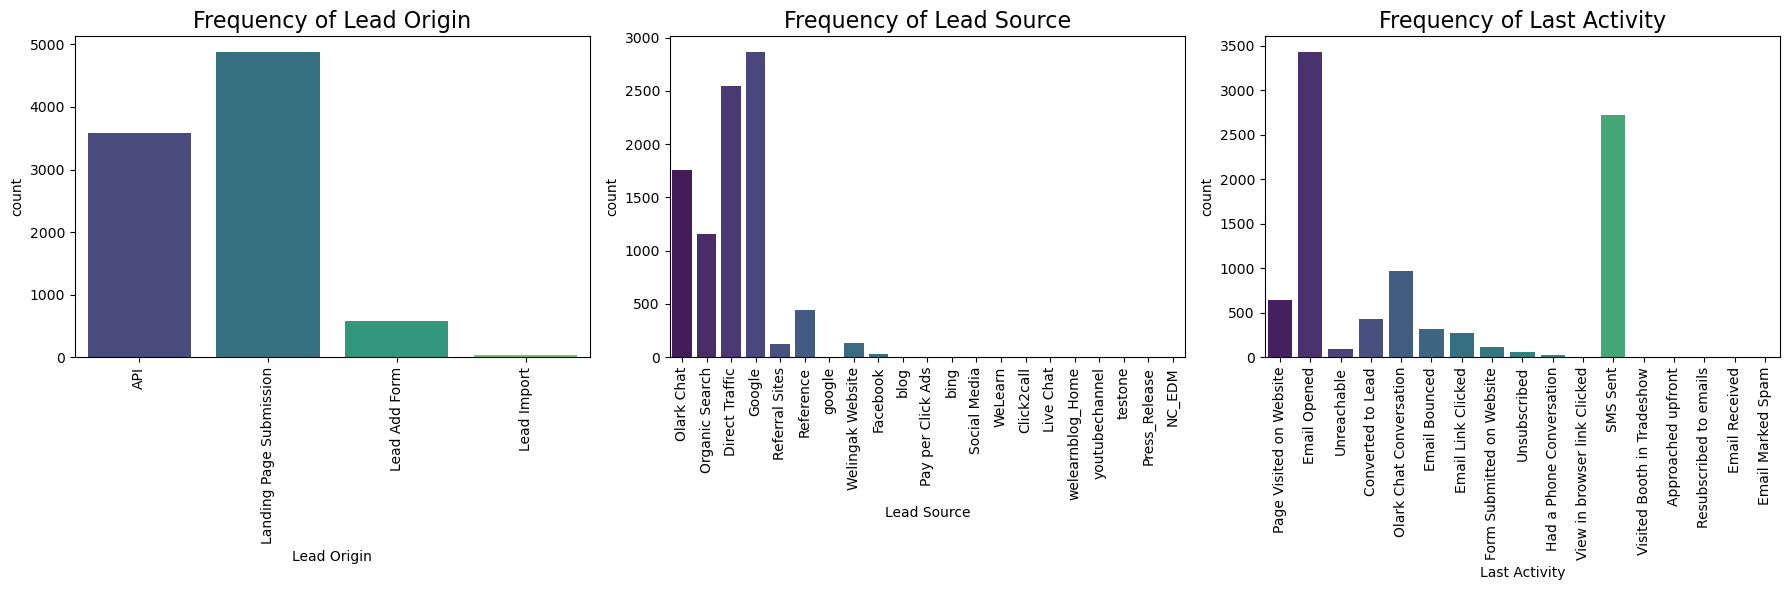

In [56]:
# Select first 3 variables for plotting
selected_vars = categorical_vars[:3]  

plt.figure(figsize=(18, 6))

for idx, var in enumerate(selected_vars):
    plt.subplot(1, 3, idx+1)
    sns.countplot(data=leads, x=var, palette='viridis')
    plt.title(f'Frequency of {var}', fontsize=16)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### Inference -

<u>Lead Origin:</u>
- The graph shows that API + Landing Page Submission is the most common source of lead enquiries, followed by Lead Add Form. Lead Import is the least common source of lead enquiries.

<u>Lead Source:</u>
- According to the graph, the most frequent lead source is Google, followed by Direct Traffic and Olark Chat. Some sources are also with Reference and Referral Sites. The least frequent lead sources are Welingak Website and others.

<u>Last Activity:</u>
- According to the graph, the customer's most frequent last activity is "Email Opened" and "SMS Sent", followed by "Olark Chat Conversion" and "Page Visited on Website".

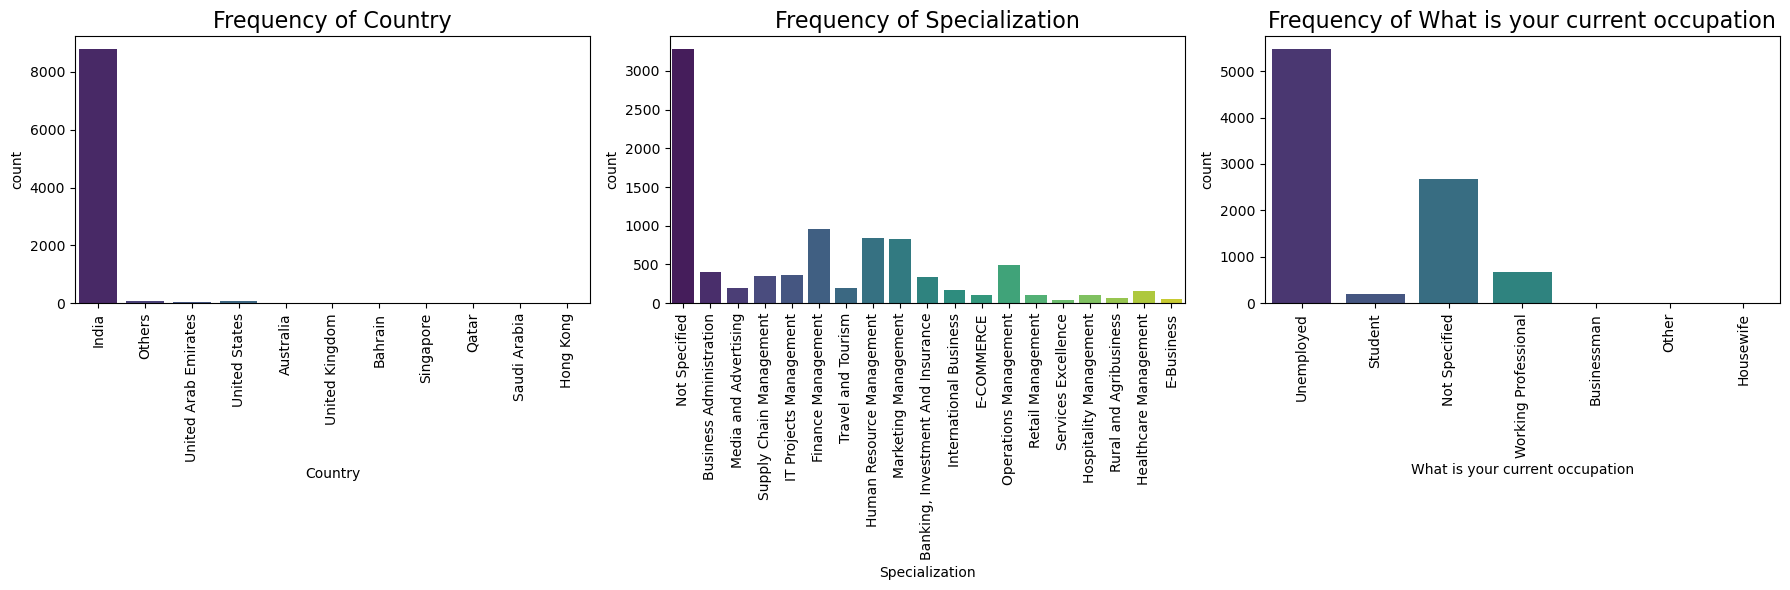

In [57]:
# Select next 3 variables for plotting
selected_vars = categorical_vars[3:6]  

plt.figure(figsize=(18, 6))

for idx, var in enumerate(selected_vars):
    plt.subplot(1, 3, idx+1)
    sns.countplot(data=leads, x=var, palette='viridis')
    plt.title(f'Frequency of {var}', fontsize=16)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<u>Country:</u>
- The country India  has the most enquiries, followed by United States and United Arab Emirates.

<u>Specialization:</u>
   - According to the graph, many customers who have not specified their Specializtion have visited this website ,followed by "Finance Managment", "Human Resource Management", "Marketing Management" and "Operations Managment"
   
<u>Current Occupation:</u>
- There are more "Unemployed" customers followed by the customers have "Not specified" their occupation. There are few 'Working Professional' leads. The "Students" are the least in number.

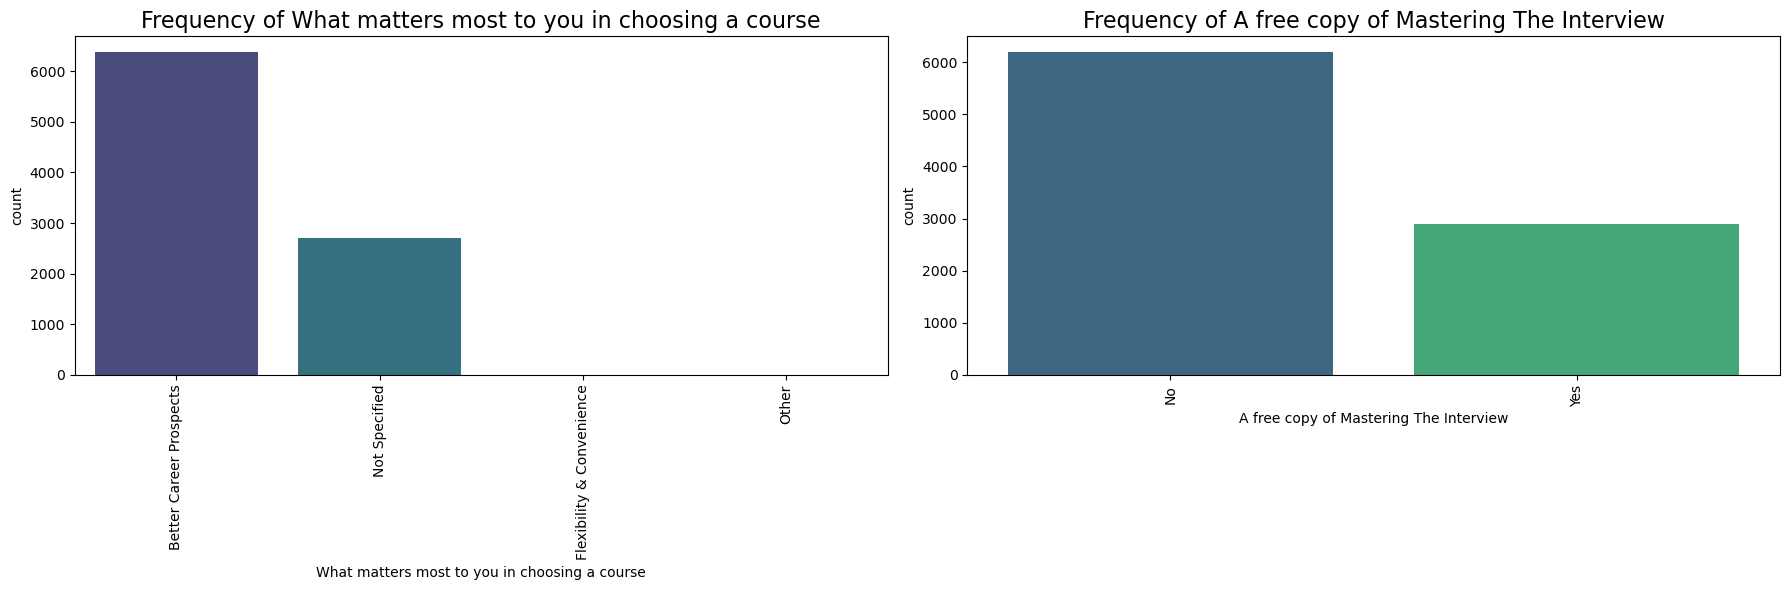

In [58]:
# Select next 2 variables for plotting
selected_vars = categorical_vars[6:8]  

plt.figure(figsize=(18, 6))

for idx, var in enumerate(selected_vars):
    plt.subplot(1, 2, idx+1)
    sns.countplot(data=leads, x=var, palette='viridis')
    plt.title(f'Frequency of {var}', fontsize=16)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<u>What matters most to you in choosing a course- </u>
- More than 6000 customers have been searching for this course for "Better Career Prospects".

<u> 'A free copy of Mastering The Interview'- </u>
- Very few people have opted for a free copy of Mastering the Interview.

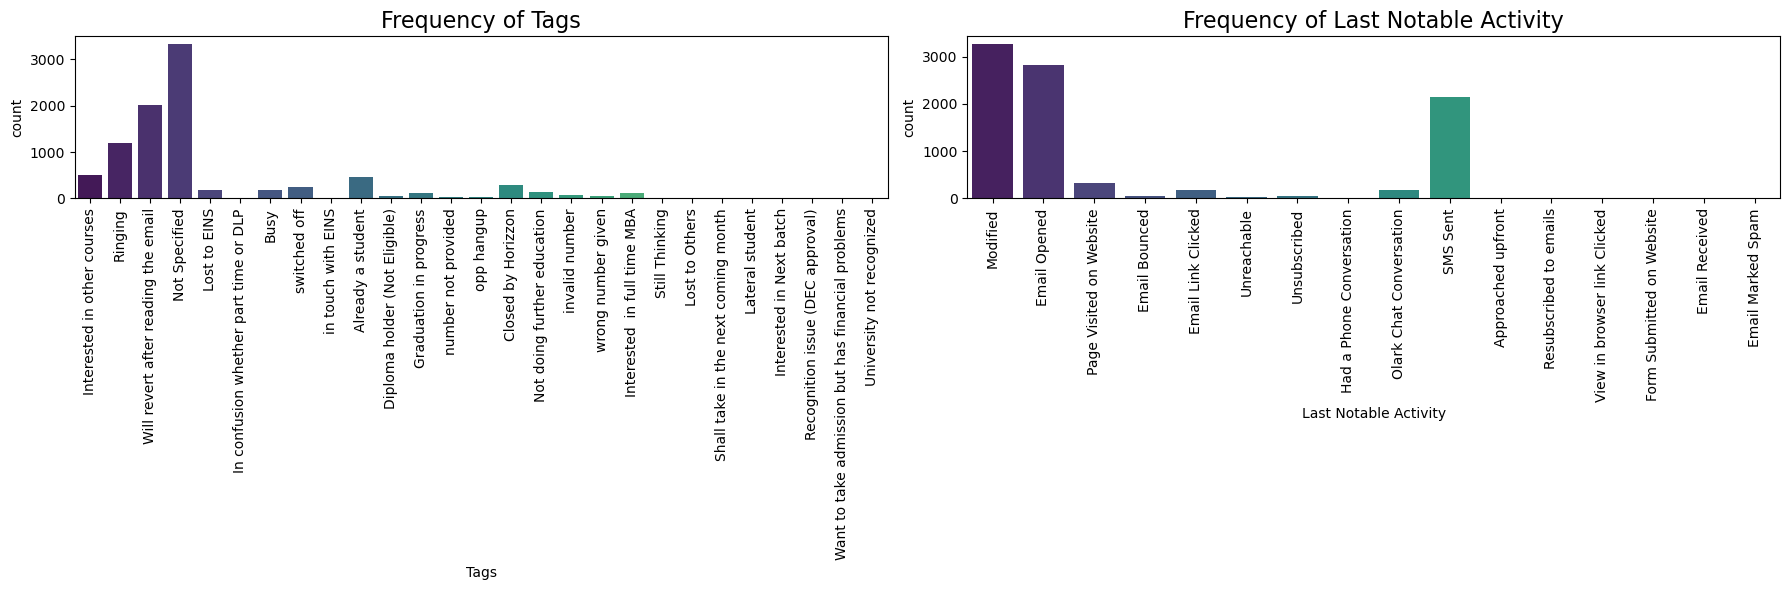

In [59]:
# Select last 2 variables for plotting
selected_vars = categorical_vars[-2:]  

plt.figure(figsize=(18, 6))

for idx, var in enumerate(selected_vars):
    plt.subplot(1, 2, idx+1)
    sns.countplot(data=leads, x=var, palette='viridis')
    plt.title(f'Frequency of {var}', fontsize=16)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<u>Tags:</u>

- The most common tag is "Will revert after reading the email", which suggests that a majority portion of the leads will revert their opinion after reading the email.
- Other common tags include "Ringing" and "Lost to EINS", which means that a significant number of leads were lost to a competitor.
- Tags such as "Already a student" and "Interested in other courses" represent same number of leads.
- There is a fair amount of interest in the course, as evidenced by tags like "Interested in other courses"
<br>

<u>Last Notable Activity:</u>
- The highest frequency of Last Notable Activity is "Modified" followed by "Email Opened" and "SMS Sent."

<h3 style="color:#B7410E;"> 3.2. BIVARIATE ANALYSIS

<h4 span style="color:blue;">  Box plots for numerical variables against Conversion status

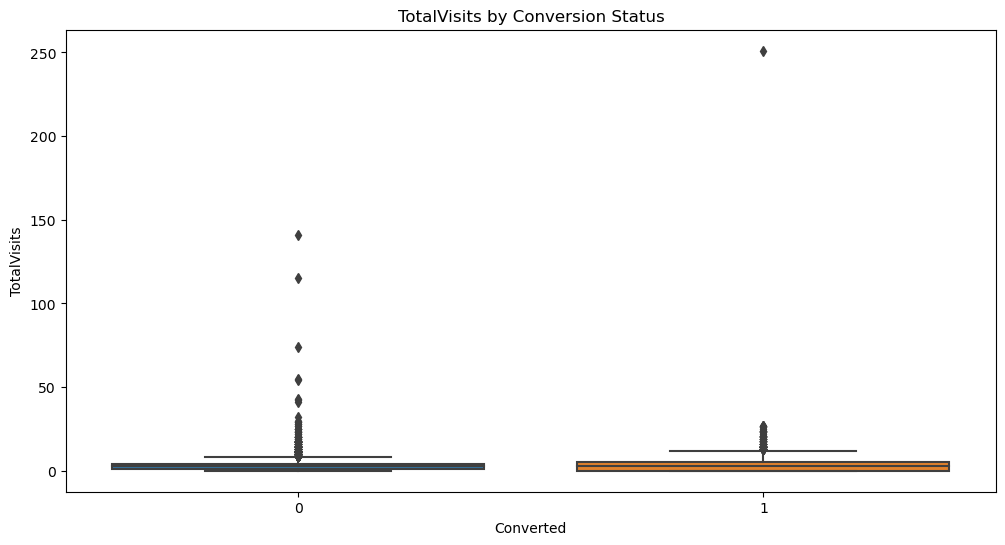

In [60]:
# Box plot of 'Total Visits'

plt.figure(figsize=(12, 6))
sns.boxplot(data=leads, x='Converted', y='TotalVisits')
plt.title('TotalVisits by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('TotalVisits')
plt.show()

**Inference** -
- The range of visits for non-converted customers is larger than the range of visits for converted customers. 
- The whiskers on the non-converted customer box are longer than the whiskers on the converted customer box. 
- This means that there is a wider spread of data points in the non-converted customer group.

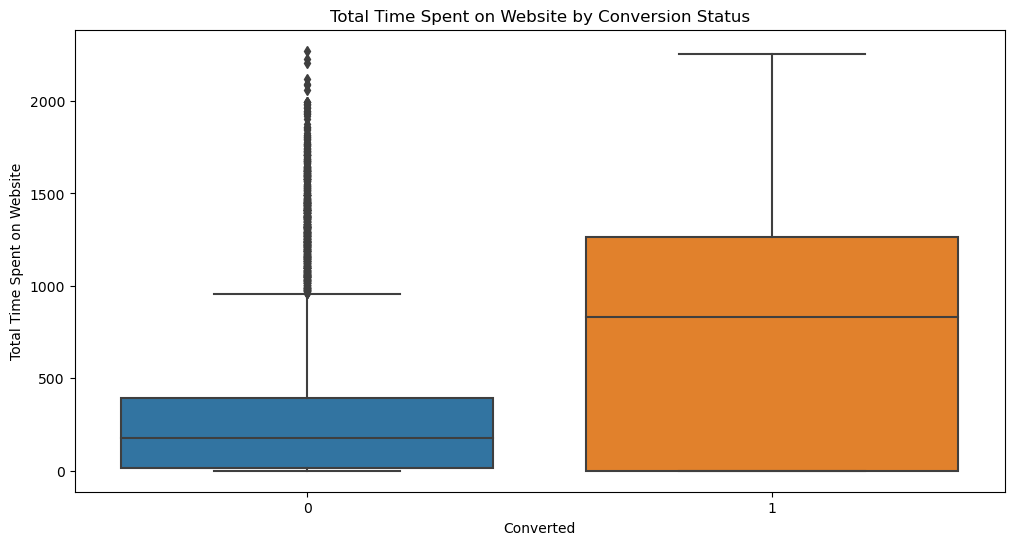

In [61]:
# Box plot of 'Total Time Spent on Website'
plt.figure(figsize=(12, 6))
sns.boxplot(data=leads, x='Converted', y='Total Time Spent on Website')
plt.title('Total Time Spent on Website by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Total Time Spent on Website')
plt.show()

**Inference** - 
- There are outliers in non-converted customer group. They could represent website visitors who spent an unusually long time on the site, either because they were very engaged or because they got lost or frustrated. 
- Overall, the graph suggests that there is a positive correlation between the total time spent on a website and conversion status. 
- In other words, visitors who spend more time on the website are more likely to convert.

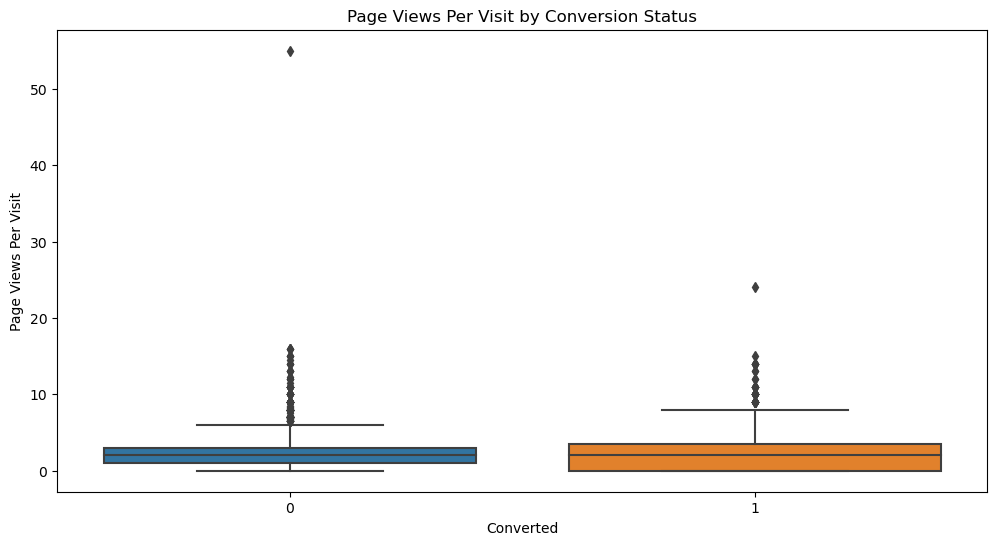

In [62]:
# Box plot of 'Page Views Per Visit'
plt.figure(figsize=(12, 6))
sns.boxplot(data=leads, x='Converted', y='Page Views Per Visit')
plt.title('Page Views Per Visit by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Page Views Per Visit')
plt.show()

- The box for the converted group is larger than the box for the not converted group. This means that the data for the converted group is more spread out, which could indicate that some converted visitors looked at many more pages than others. Visitors who look at more pages are more likely to convert.
- There are outliers in both groups, which means that there are some visitors who looked at a very high (or very low) number of pages.

<h4 span style="color:blue;">  Scatter plots for numerical variables against the target variable <i>'Converted'</i>

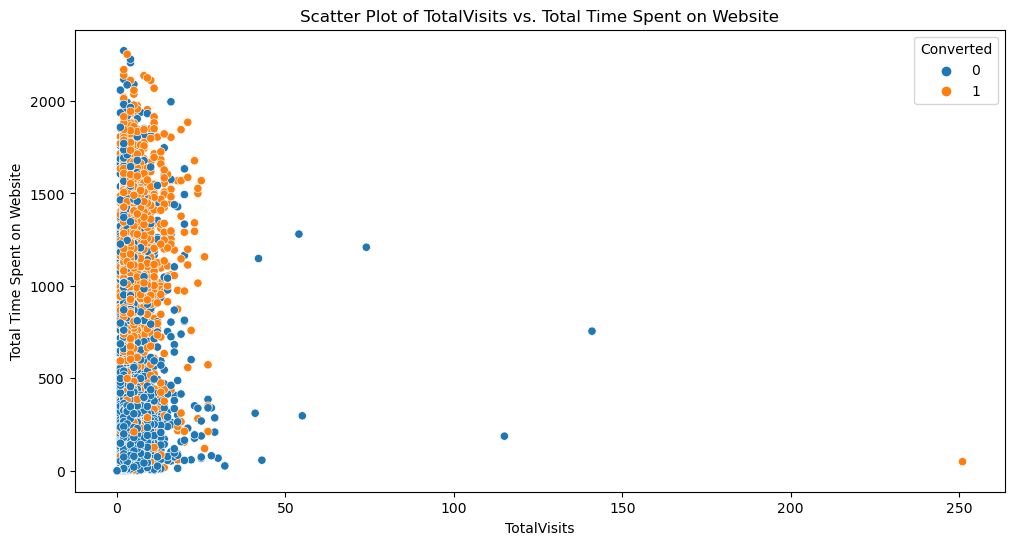

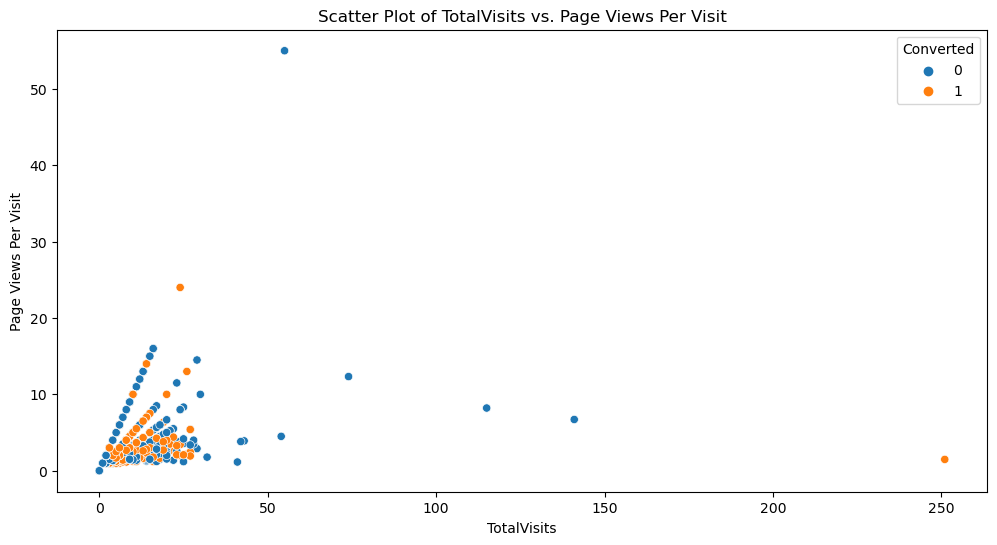

In [63]:
# Scatter plots for numerical variables against the target variable Converted
plt.figure(figsize=(12, 6))
sns.scatterplot(data=leads, x='TotalVisits', y='Total Time Spent on Website', hue='Converted')
plt.title('Scatter Plot of TotalVisits vs. Total Time Spent on Website')
plt.xlabel('TotalVisits')
plt.ylabel('Total Time Spent on Website')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=leads, x='TotalVisits', y='Page Views Per Visit', hue='Converted')
plt.title('Scatter Plot of TotalVisits vs. Page Views Per Visit')
plt.xlabel('TotalVisits')
plt.ylabel('Page Views Per Visit')
plt.show()

`TotalVisits` & `Page Views Per Visit` seems to have positive corelation with each other. Also they have little trend for both converted & non_converted leads. It appears that converted visits tend to have more page views per visit than non-converted visits. This would be kept in mind during model evaluation.

<h3 span style="color:#B7410E;"> 3.3  SEGMENTED ANALYSIS ON TARGET VARIABLE 'CONVERTED'

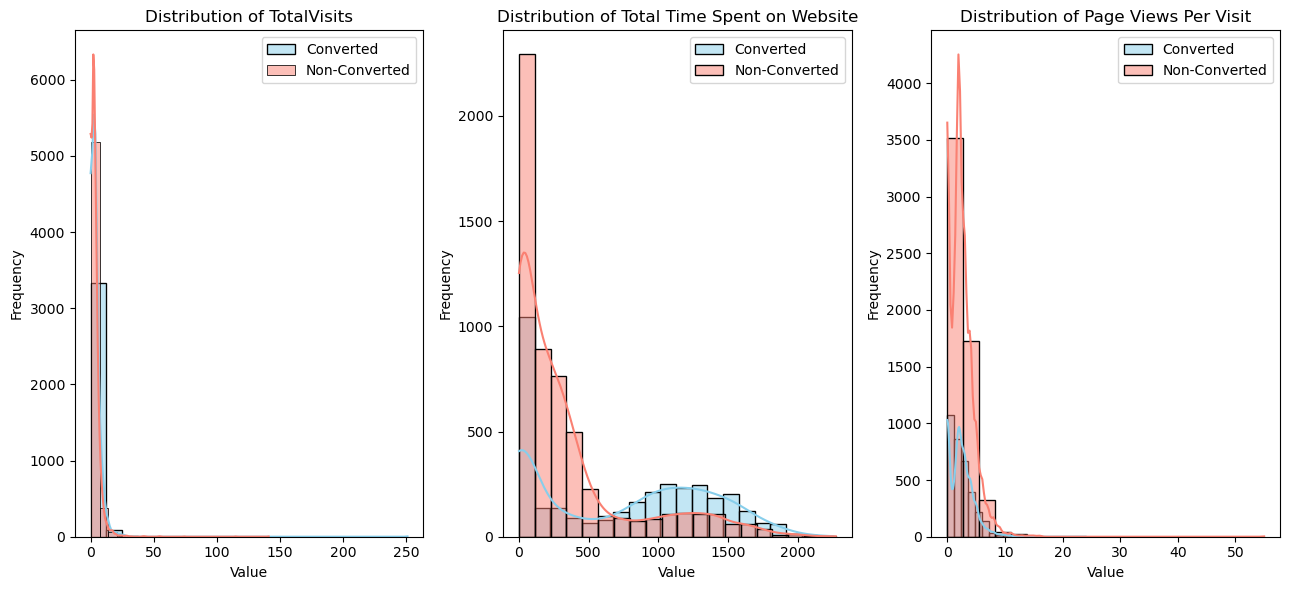

In [64]:
# Set up the figure with a specific size
plt.figure(figsize=(13, 6))

# Iterate over numeric variables
for i, var in enumerate(numeric_vars, 1):
    # Create subplots with 1 row, 3 columns, and iterate over each variable
    plt.subplot(1, 3, i)
    
    # Plot histogram with KDE (Kernel Density Estimation) for converted leads
    sns.histplot(data=converted_leads[var], bins=20, kde=True, color='skyblue', label='Converted')
    
    # Plot histogram with KDE for non-converted leads
    sns.histplot(data=non_converted_leads[var], bins=20, kde=True, color='salmon', label='Non-Converted')
    
    # Set title for each subplot
    plt.title(f'Distribution of {var}')
    
    # Set labels for x and y axes
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Add legend to distinguish converted and non-converted leads
    plt.legend()

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()

<u><b>Total Visits - 
- It appears that there are more non-converted leads than converted leads. 
- Overall, the number of visits of the converted leads seems to follow a bell curve distribution, with the highest frequency of visits around the value of 5000. There are also fewer visits at the ends of the spectrum (values close to 0 and 250).
- The area under the pink curve (non-converted leads) is visibly larger than the area under the blue curve (converted leads). This suggests that there is a higher frequency of non-converted leads than converted leads.

<u><b>Total time spent on the website - 

- It appears that there are more website visitors who spend less time on the site and don't convert (represented by the pink line) compared to those who spend more time and convert (represented by the blue line). 
- There is a peak around 250 for the non-converted leads, whereas the converted leads distribution appears flatter across the time range.

<u><b>Page Views Per Visit -
    
- The graph suggests that people who convert tend to look at more pages on the website than people who don't convert. 
-  Non-converted leads, is highest at 1-2 page views and tapers off from there.  Converted leads, is highest at around 4-7 page views suggesting that a higher proportion of people who convert visit several pages on the website.
- Both the pink and blue lines show a long tail, which means that there is a small number of people who view many pages (over 40) on the website.

### Stacked bar charts exploring relationship between multiple categorical variables and target variable Converted

In [65]:
# Categorical variables
categorical_vars

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'A free copy of Mastering The Interview',
 'Tags',
 'Last Notable Activity']

In [66]:
# Defining function for plotting

def plot_segmented_univariate_analysis(index):
    # Define the variable for segmented analysis
    segment_variable = categorical_vars[index]

    # Prepare data for the stacked bar chart
    data = leads.groupby([segment_variable, 'Converted']).size().unstack()

    # Plot segmented univariate analysis with stacked bar chart
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', stacked=True, colormap='viridis')

    # Set plot title and labels
    plt.title(f'{segment_variable} ', fontsize=16)
    plt.xlabel(segment_variable, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90)
    plt.legend(labels=['Not Converted', 'Converted'])

    # Display the plot
    plt.show()


<h3><i> Lead Origin

<Figure size 1000x600 with 0 Axes>

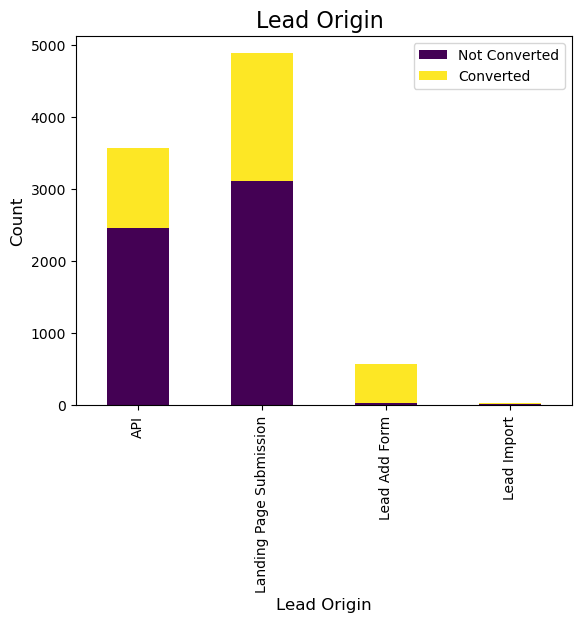

In [67]:
# Call the function with the index

index = 0  # Lead Origin

plot_segmented_univariate_analysis(index)

**Inference:**

- The 'Lead Add Form' is the lead origin with the highest proportion of converted leads among all the leads.
- Landing Page Submission has the highest conversion rate of all the lead origins. 
- API has the second highest number of total leads but one of the lowest conversion rates.


<h3><i> Lead Source

<Figure size 1000x600 with 0 Axes>

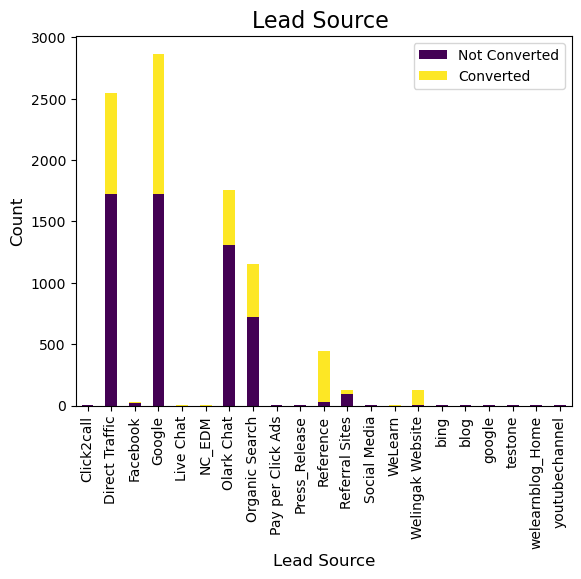

In [68]:
# Call the function with the index

index = 1  # Lead Source

plot_segmented_univariate_analysis(index)

**Inference:**

- The 'Reference' is the lead source with the highest proportion of converted leads among all the leads.
- Google is the top converting lead source: This suggests that people who find the company through Google are more likely to convert into leads than people from other sources.
- Direct Traffic, Olark Chat and Organic Search are also relatively good at converting leads.

<h3><i> Last Activity

<Figure size 1000x600 with 0 Axes>

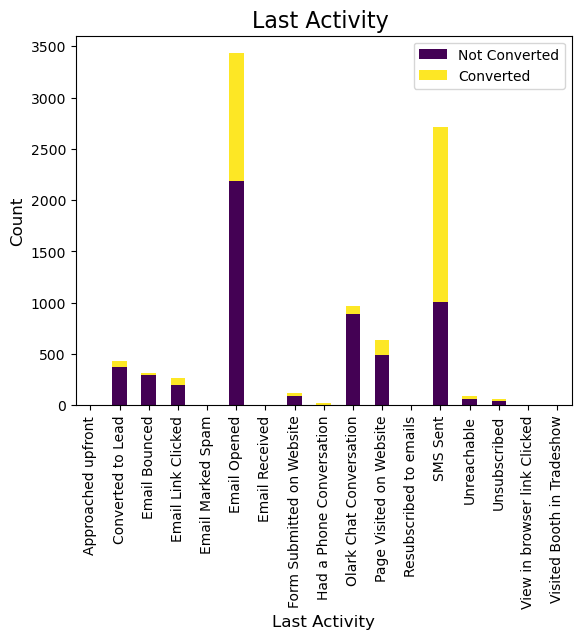

In [69]:
# Call the function with the index

index = 2  # Last Activity

plot_segmented_univariate_analysis(index)

**Inference:**

- The graph shows that the most common activity that leads to conversion is checking the SMS sent. This is followed by approaching a salesperson at a tradeshow, filling out a form on the website, and having a phone conversation.


<h3><i>Country

<Figure size 1000x600 with 0 Axes>

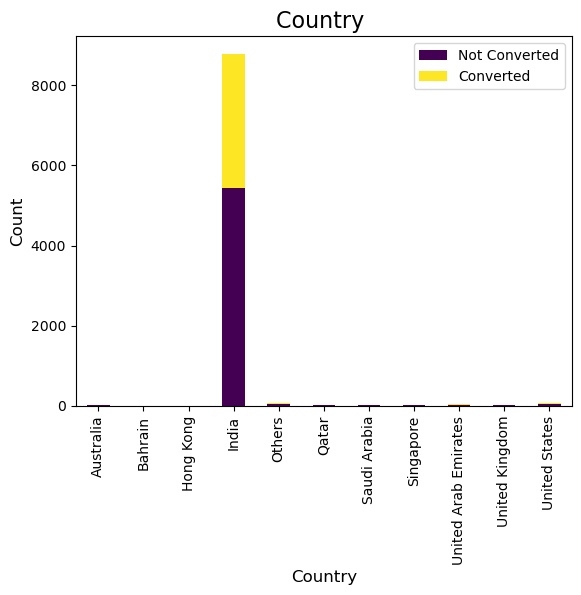

In [70]:
# Call the function with the index

index = 3  # Country

plot_segmented_univariate_analysis(index)

**Inference:**

- The conversion in India is the highest among all the other countries. This variable would be of less importance in building model.

<h3><i>Specialization

<Figure size 1000x600 with 0 Axes>

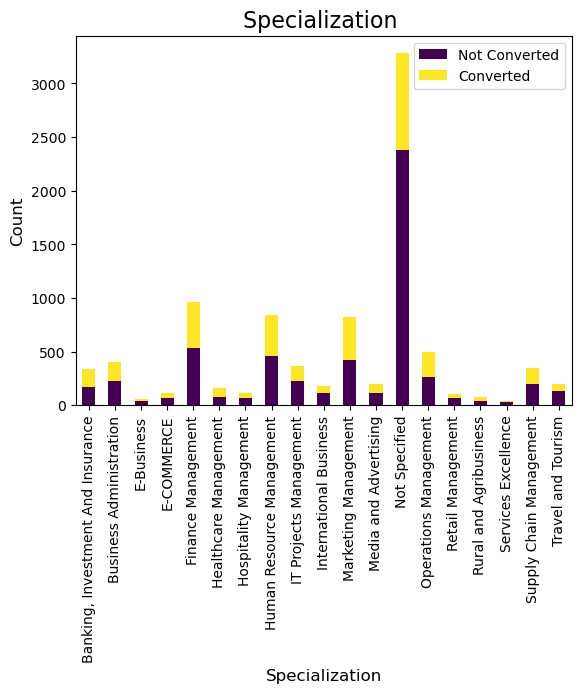

In [71]:
# Call the function with the index

index = 4  # Specialization

plot_segmented_univariate_analysis(index)

**Inference:**

- It appears that the conversion rate is higher for specializations in Finance Managment, Human Resources Managment, and Marketing Management. Leads in 'Not Specified' category also appear to have a relatively high conversion rate.

<h3><i>What is your current occupation

<Figure size 1000x600 with 0 Axes>

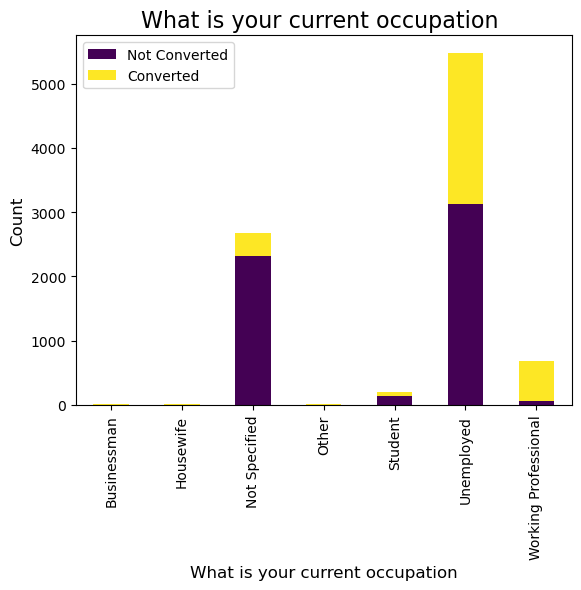

In [72]:
# Call the function with the index

index = 5  # What is your current occupation

plot_segmented_univariate_analysis(index)

**Inference:**

- The conversion rate is highest among unemployed individuals, closely trailed by nearly all working professionals.

<h3><i>What matters most to you in choosing a course

<Figure size 1000x600 with 0 Axes>

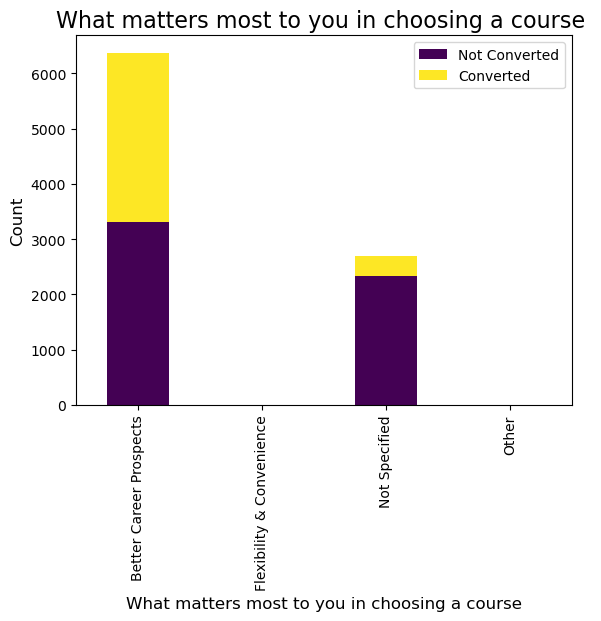

In [73]:
# Call the function with the index

index = 6  # What matters most to you in choosing a course

plot_segmented_univariate_analysis(index)

**Inference:**

- The primary reason why individuals are opting for these courses is to enhance their skills mainly for 'Better Career Prospects', which also exhibits the highest lead conversion rate.


<h3><i>A free copy of Mastering The Interview

<Figure size 1000x600 with 0 Axes>

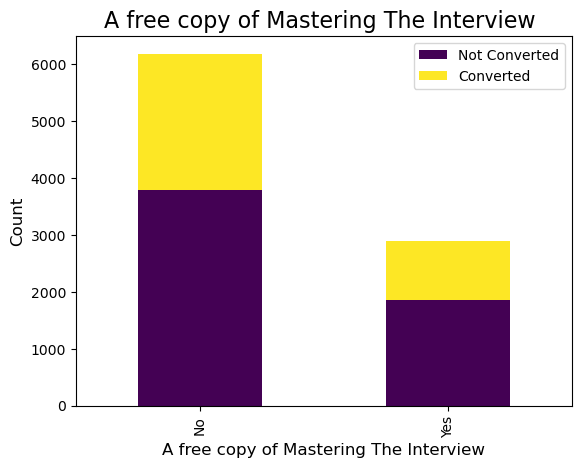

In [74]:
# Call the function with the index

index = 7  # A free copy of Mastering The Interview

plot_segmented_univariate_analysis(index)

**Inference:**

- The lead conversion rate for the leads who have not opted for a free copy of Mastering the Interview is higher than those who have opted for it.


<h3><i>Tags

<Figure size 1000x600 with 0 Axes>

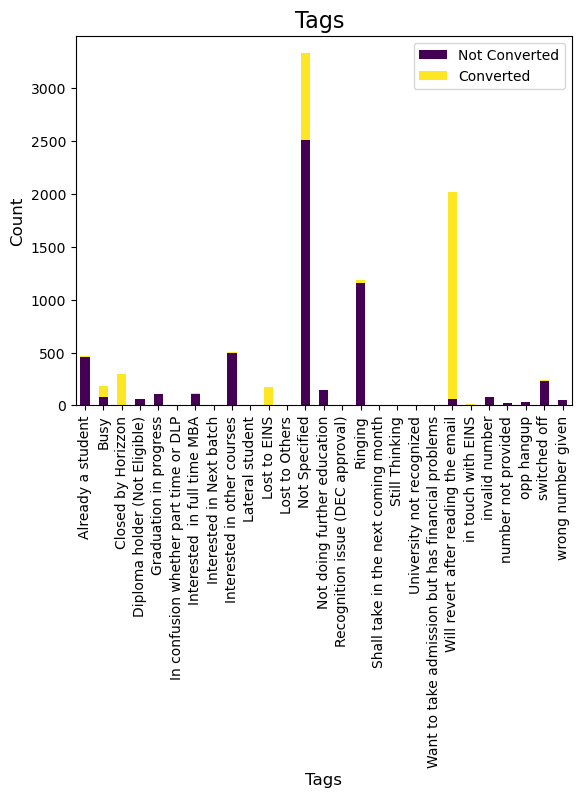

In [75]:
# Call the function with the index

index = 8  # Tags

plot_segmented_univariate_analysis(index)

**Inference :**

- Highest Conversion rate is from the leads who have reverted back after reading the email recieved from the company.  The yellow bar, representing converted leads, is taller for this than for any others.
- The 'Lost to EINS' and 'Closed by Horizon' tags display fully yellow bars, suggesting that nearly all leads from these sources have been converted.
- Some 'Busy' tags have also been converted, while the remaining tags show no conversions.

<h3><i>Last Notable Activity

<Figure size 1000x600 with 0 Axes>

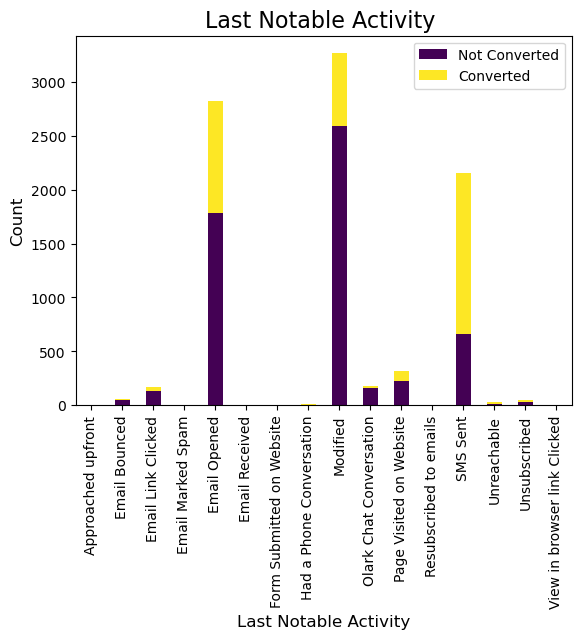

In [76]:
# Call the function with the index

index = -1  # Last Notable Activity

plot_segmented_univariate_analysis(index)

**Inference:**

-  It appears that converting website visitors into leads is more successful through SMS sent and when the email is opened than other interactions.  The yellow bars, representing converted leads, are taller for these activities than for any others.

<h3 style="color:#B7410E;"> 3.4. MULTIVARIATE ANALYSIS

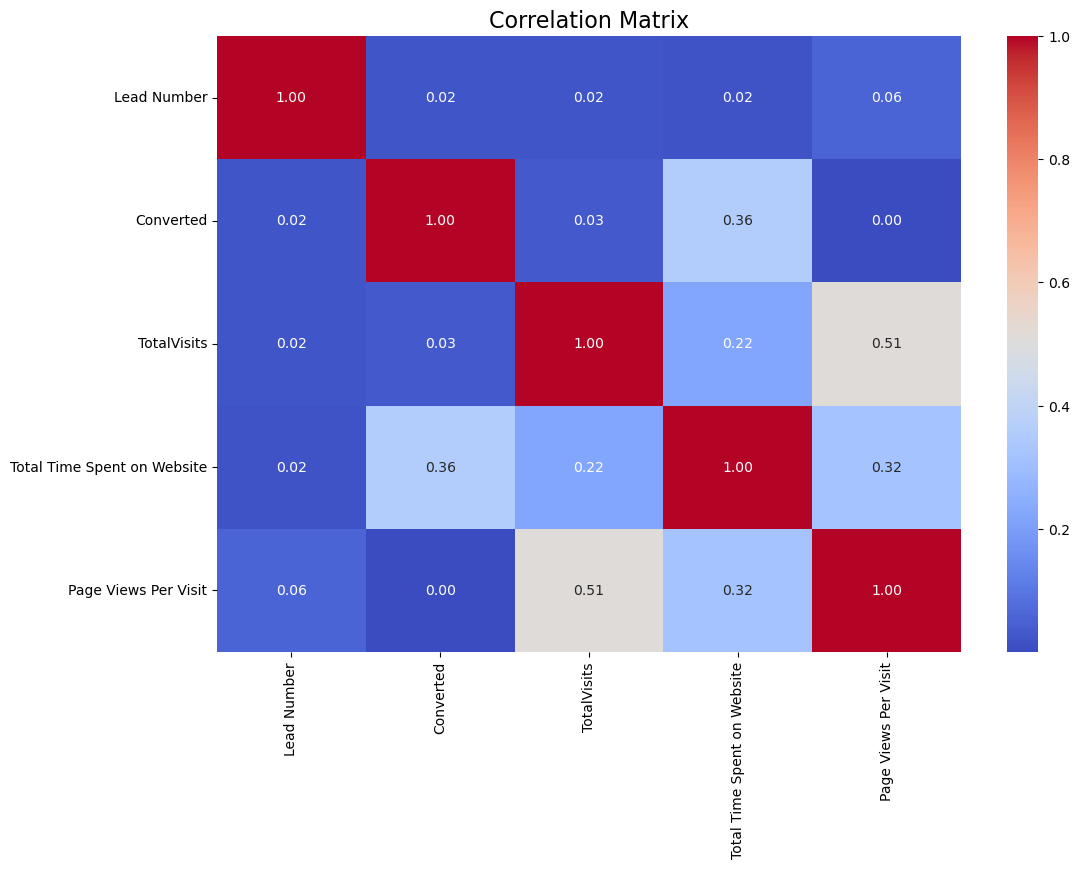

In [77]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(leads.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

**Inference**

- There is a weak positive correlation between Total Visits and Page Views Per Visit (0.51). This means that there is a slight tendency for people who visit the website more times to view more pages per visit.
- There is a moderate positive correlation between Total Time Spent on Website and Page Views Per Visit (0.32). This means that there is a moderate tendency for people who spend more time on the website to view more pages per visit.

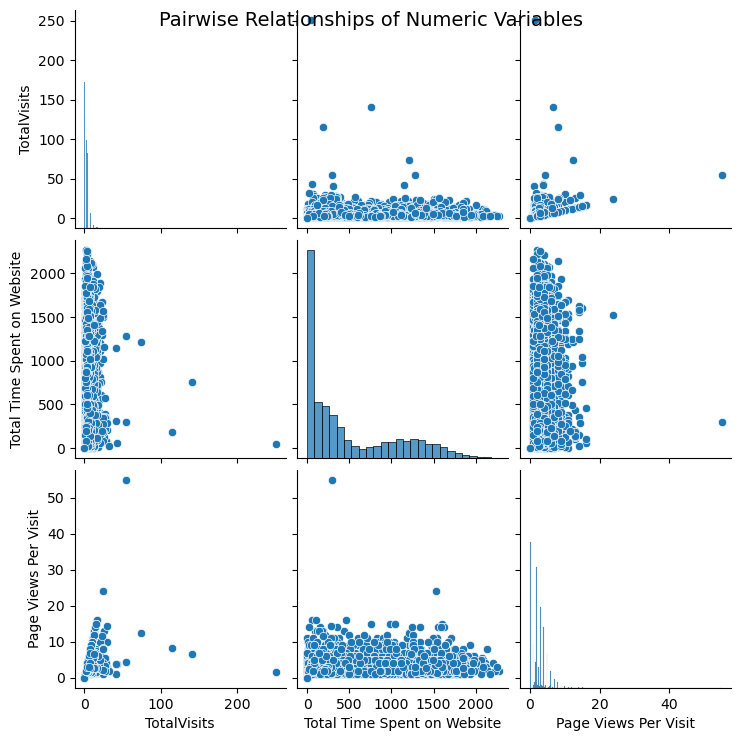

In [78]:
# Pair plots for numeric variables
sns.pairplot(leads[numeric_vars])
plt.suptitle('Pairwise Relationships of Numeric Variables', fontsize=14)
plt.show()

**Inference -**
- It appears there is a weak positive correlation between total visits and total time spent on website. This means that as the number of total visits increases, there is a slight increase in total time spent on website. 
- There is a  weaker positive correlation between total time spent on website and page views per visit. This means that as the total time spent on website increases, there is a slight increase in page views per visit.

<h1 style="color:green;">Step 4: Data Cleaning and Preparation

In [79]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

`Prospect ID` and `Lead Number` are deemed non-contributory to model building. Therefore, they will be dropped.

In [80]:
leads = leads.drop(['Prospect ID'], axis=1)

In [81]:
leads = leads.drop(['Lead Number'], axis=1)

In [82]:
leads['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

Analyzing this variable alongside other relevant features in the dataset can provide valuable insights into lead behavior and preferences. Therefore, it is useful for analysis.

In [83]:
leads['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [84]:
leads['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [85]:
leads['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [86]:
leads['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [87]:
leads['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [88]:
leads['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [89]:
leads['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [90]:
leads['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [91]:
leads['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [92]:
leads['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [93]:
leads['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [94]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64


- Based on the distribution of values in the some of the above variables, it appears that the vast majority of values are `'No'`, with only a very small number of `'Yes'` values and also there are variables which are completely `"No"` in the data which causes an imbalance.<br>
- The imbalance in the data, where one category overwhelmingly dominates the other, can lead to issues in model training and prediction. <br>
- In such cases, these variables may not provide significant predictive power or meaningful insights for your analysis or modeling tasks. It is generally safe to consider dropping the variable from the dataset. <br><br>

<p>In this case, the imbalance might make it challenging for the model to learn meaningful patterns from the data.
So it's better to drop these variables.

In [95]:
#adding imbalanced columns to a new variable named imbalance_cols_to_drop

imbalance_cols_to_drop = ['Do Not Call', 'Magazine', 'Search','X Education Forums', 'Newspaper', 'Newspaper Article',
                     'Through Recommendations', 'Digital Advertisement','I agree to pay the amount through cheque',
                     'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 
                     'Get updates on DM Content']

imbalance_cols_to_drop

['Do Not Call',
 'Magazine',
 'Search',
 'X Education Forums',
 'Newspaper',
 'Newspaper Article',
 'Through Recommendations',
 'Digital Advertisement',
 'I agree to pay the amount through cheque',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Get updates on DM Content']

In [96]:
# Dropping the imbalanced variables
leads = leads.drop(imbalance_cols_to_drop, axis=1)

**Let's look into the remaining categorical variables.**

In [97]:
leads['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [98]:
leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [99]:
# Replace lower frequency values with 'Other'
lower_freq_countries = leads['Last Notable Activity'].value_counts()[leads['Last Notable Activity'].value_counts() < 3].index.tolist()
leads['Last Notable Activity'] = leads['Last Notable Activity'].apply(lambda x: 'Other Notable Activity' if x in lower_freq_countries else x)

In [100]:
# Verifying the values again after replacing 
leads['Last Notable Activity'].value_counts()

Modified                    3267
Email Opened                2823
SMS Sent                    2152
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  45
Unreachable                   32
Had a Phone Conversation      14
Other Notable Activity         7
Name: Last Notable Activity, dtype: int64

Both the variables are balanced and are useful for analysis. Let's look into the dataset again.

Analyzing these variables alongside other relevant features in the dataset can provide valuable insights into lead behavior and preferences. Therefore, they are useful for analysis.

<h3 style="color:#B7410E;"><i> Treatment of Outliers

As seen earlier in the boxplots, the outliers exist in `TotalVisits` and `Page Views Per Visit`. 

In [101]:
# Storing the continuous variables in variable named num_leads
num_leads = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

As seen earlier, there are outliers in 'TotalVisits' and 'Page Views Per Visit'. We will cap the outliers to 95% value for analysis.

**Total Visits**

In [102]:
# Calculate the 95th percentile value of the 'TotalVisits' column
percentile_95 = leads['TotalVisits'].quantile(0.95)

# Cap the outliers to the 95th percentile value
leads['TotalVisits'] = leads['TotalVisits'].apply(lambda x: min(x, percentile_95))


**Page Views Per Visit**

In [103]:
# Calculate the 95th percentile value of the 'Page Views Per Visit' column
percentile_95 = leads['Page Views Per Visit'].quantile(0.95)

# Cap the outliers to the 95th percentile value
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].apply(lambda x: min(x, percentile_95))


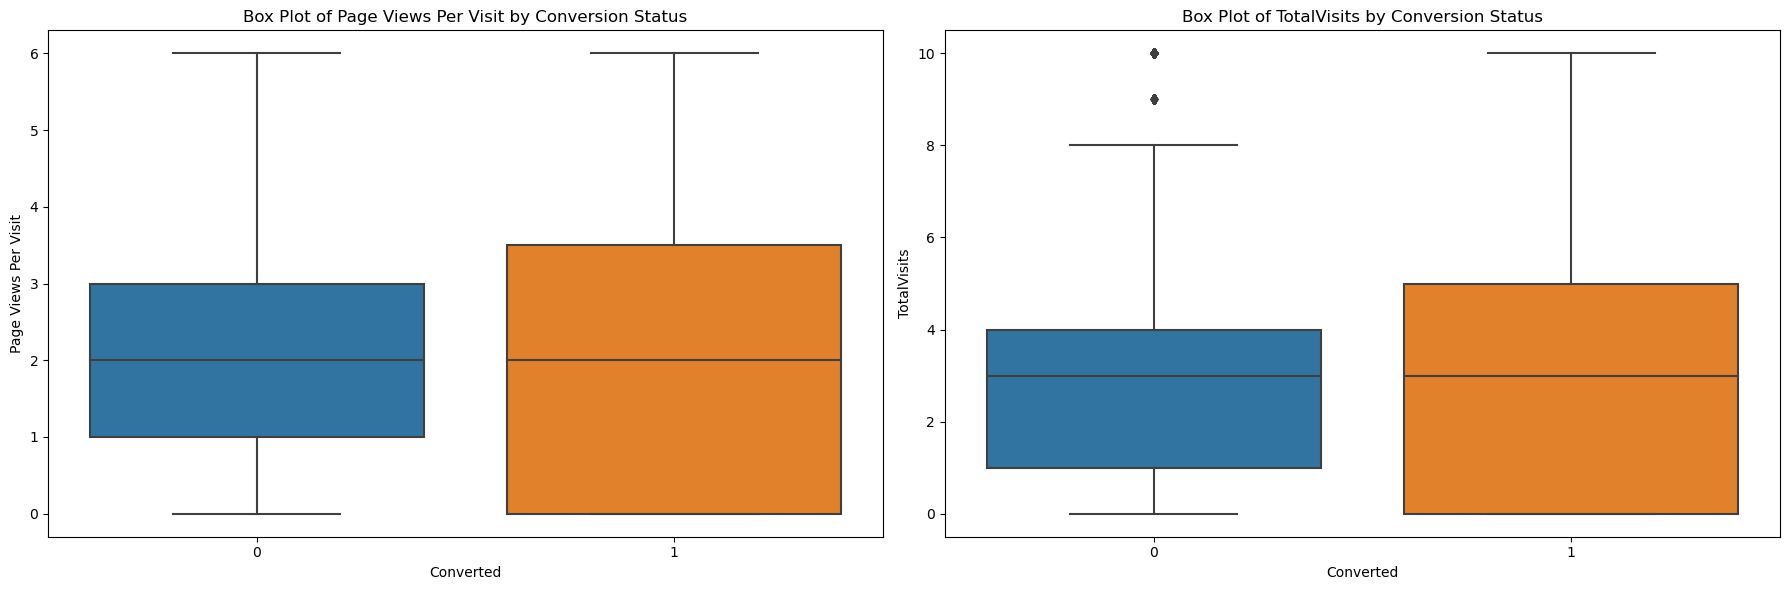

In [104]:
# Box plot of 'Page Views Per Visit' and 'Total Visits' after capping the outliers

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Box plot of 'Page Views Per Visit'
sns.boxplot(data=leads, x='Converted', y='Page Views Per Visit', ax=axes[0])
axes[0].set_title('Box Plot of Page Views Per Visit by Conversion Status')
axes[0].set_xlabel('Converted')
axes[0].set_ylabel('Page Views Per Visit')

# Box plot of 'Total Visits'
sns.boxplot(data=leads, x='Converted', y='TotalVisits', ax=axes[1])
axes[1].set_title('Box Plot of TotalVisits by Conversion Status')
axes[1].set_xlabel('Converted')
axes[1].set_ylabel('TotalVisits')

# Display the plots
plt.tight_layout()
plt.show()

In [105]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
95%      10.000000                  1557.000000              6.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

From the distribution shown above, you can see that there no outliers in your data, other than two which are in `Total Visits`.

In [106]:
# Looking at the specifics of the final dataframe after dropping
leads.shape

(9074, 15)

After the data cleaning, the dataset contains:
- 9074 rows
- 15 columns

In [107]:
# Final variables in the dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Converted                                      9074 non-null   int64  
 4   TotalVisits                                    9074 non-null   float64
 5   Total Time Spent on Website                    9074 non-null   int64  
 6   Page Views Per Visit                           9074 non-null   float64
 7   Last Activity                                  9074 non-null   object 
 8   Country                                        9074 non-null   object 
 9   Specialization                                 9074 

<h1 style="color:green;"> Step 5: Feature Engineering

In [108]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website   India            Not Specified   
1             Email Opened   India            Not Specified   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India            Not Specified   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags A free copy of Mastering The Interview  \
0          Interested in other courses                                     No   
1                              Ringing                                     No   
2  Will revert after reading the email                                    Yes   
3                              Ringing                                     No   
4  Will revert after reading the email                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

<h3 style="color:#B7410E;">
    5.1.  Converting the binary variables (Yes/No) to 0/1

In [109]:
# List of variables to map

    varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads list
leads[varlist] = leads[varlist].apply(binary_map)

In [110]:
leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website   India            Not Specified   
1             Email Opened   India            Not Specified   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India            Not Specified   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags  \
0          Interested in other courses   
1                              Ringing   
2  Will revert after reading the email   
3                              Ringing   
4  Will revert after reading the email   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

<h3 style="color:#B7410E;">
5.2.  For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [111]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'What matters most to you in choosing a course', 'Lead Source',
                              'Last Activity','Country','Specialization','Tags',
                               'What is your current occupation','Last Notable Activity' ]], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [112]:
leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity Country           Specialization  ...  \
0  Page Visited on Website   India            Not Specified  ...   
1             Email Opened   India            Not Specified  ...   
2             Email Opened   India  Business Administration  ...   
3              Unreachable   India    Media and Advertising  ...   
4        Converted to Lead   India            Not Specified  ...   

  Last Notable Activity_Email Link Clicked Last Notable Activity_Email Opened  \
0                                        0                                  0   
1                                        0                                  1   
2                                        0                                  1   
3                                        0                                  0   
4                                        0                                  0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Other Notable Activity  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 127 columns]

In [113]:
leads.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 127 columns):
 #    Column                                                                   Dtype  
---   ------                                                                   -----  
 0    Lead Origin                                                              object 
 1    Lead Source                                                              object 
 2    Do Not Email                                                             int64  
 3    Converted                                                                int64  
 4    TotalVisits                                                              float64
 5    Total Time Spent on Website                                              int64  
 6    Page Views Per Visit                                                     float64
 7    Last Activity                                                            object 
 8    Country         

In [114]:
leads.shape

(9074, 127)

#### Dropping the repeated variables¶

In [115]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'What matters most to you in choosing a course', 'Lead Source',
                              'Last Activity','Country','Specialization','Tags',
                               'What is your current occupation','Last Notable Activity'], 1)

In [116]:
leads.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 118 columns):
 #    Column                                                                   Dtype  
---   ------                                                                   -----  
 0    Do Not Email                                                             int64  
 1    Converted                                                                int64  
 2    TotalVisits                                                              float64
 3    Total Time Spent on Website                                              int64  
 4    Page Views Per Visit                                                     float64
 5    A free copy of Mastering The Interview                                   int64  
 6    Lead Origin_Landing Page Submission                                      uint8  
 7    Lead Origin_Lead Add Form                                                uint8  
 8    Lead Origin_Lead

Now you can see that you have all variables as numeric.

In [117]:
leads.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  \
0                        0   
1                        0   
2                        0   
3                        0   
4                        0   

   What matters most to you in choosing a course_Flexibility & Convenience  \
0                                                  0                         
1                                                  0                         
2                                                  0                         
3                                                  0                         
4                                                  0                         

   ...  Last Notable Activity_Email Link Clicked  \
0  ...                                         0   
1  ...                                         0   
2  ...                                         0   
3  ...                                         0   
4  ...                                         0   

   Last Notable Activity_Email Opened  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Other Notable Activity  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachabl

In [118]:
leads.shape

(9074, 118)

Now the size of the dataset is having 9074 rows and 118 columns.

<h1 style="color:green;"> Step 6: Test-Train Split

In [119]:
# Importing necessary libraries from scikit-learn
from sklearn.model_selection import train_test_split

In [120]:
# Splitting the dataset into training and testing sets

# Putting feature variables to X
X = leads.drop(['Converted'], axis=1)

X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  \
0                        0   
1                        0   
2                        0   
3                        0   
4                        0   

   What matters most to you in choosing a course_Flexibility & Convenience  \
0                                                  0                         
1                                                  0                         
2                                                  0                         
3                                                  0                         
4                                                  0                         

   What matters most to you in choosing a course_Not Specified  ...  \
0                                                  0            ...   
1                                                  0            ...   
2                                                  0            ...   
3                                                  0            ...   
4                                                  0            ...   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Last Notable Activity_Email Opened  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Other Notable Activity  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website 

In [121]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [122]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

<h1 style="color:green;"> Step 7: Feature Scaling

In [123]:
# Importing necessary libraries from scikit-learn for Scaling
from sklearn.preprocessing import StandardScaler

In [124]:
# Preprocessing the data using StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0    -0.432779                    -0.160255   
1012             1    -0.432779                    -0.540048   
9226             0    -1.150329                    -0.888650   
4750             0    -0.432779                     1.643304   
7987             0     0.643547                     2.017593   

      Page Views Per Visit  A free copy of Mastering The Interview  \
3009             -0.155018                                       1   
1012             -0.155018                                       0   
9226             -1.265540                                       0   
4750             -0.155018                                       0   
7987              0.122613                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  \
3009                        0   
1012                        0   
9226                        0   
4750                        0   
7987                        0   

      What matters most to you in choosing a course_Flexibility & Convenience  \
3009                                                  0                         
1012                                                  0                         
9226                                                  0                         
4750                                                  0                         
7987                                                  0                         

      What matters most to you in choosing a course_Not Specified  ...  \
3009                                                  1            ...   
1012                                                  1            ...   
9226                                                  0            ...   
4750                                                  1            ...   
7987                                                  0            ...   

      Last Notable Activity_Email Link Clicked  \
3009                                         0   
1012                                         0   
9226                                         0   
4750                                         0   
7987                                         0   

      Last Notable Activity_Email Opened  \
3009                                   1   
1012                                   0   
9226                                   0   
4750                                   0   
7987                                   0   

      Last Notable Activity_Had a Phone Conversation  \
3009                                               0   
1012                                               0   
9226                                               0   
4750                                               0   
7987                                               0   

      Last Notable Activity_Modified  \
3009                               0   
1012                               0   
9226                               1   
4750                               0   
7987                               1   

      Last Notable Activity_Olark Chat Conversation  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Other Notable Activity  \
3009                                             0   
1012                                             0   

In [125]:
### Checking the converted Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

37.85541106458012

**The conversion rate is almost 38%.**

#### Looking at Correlations

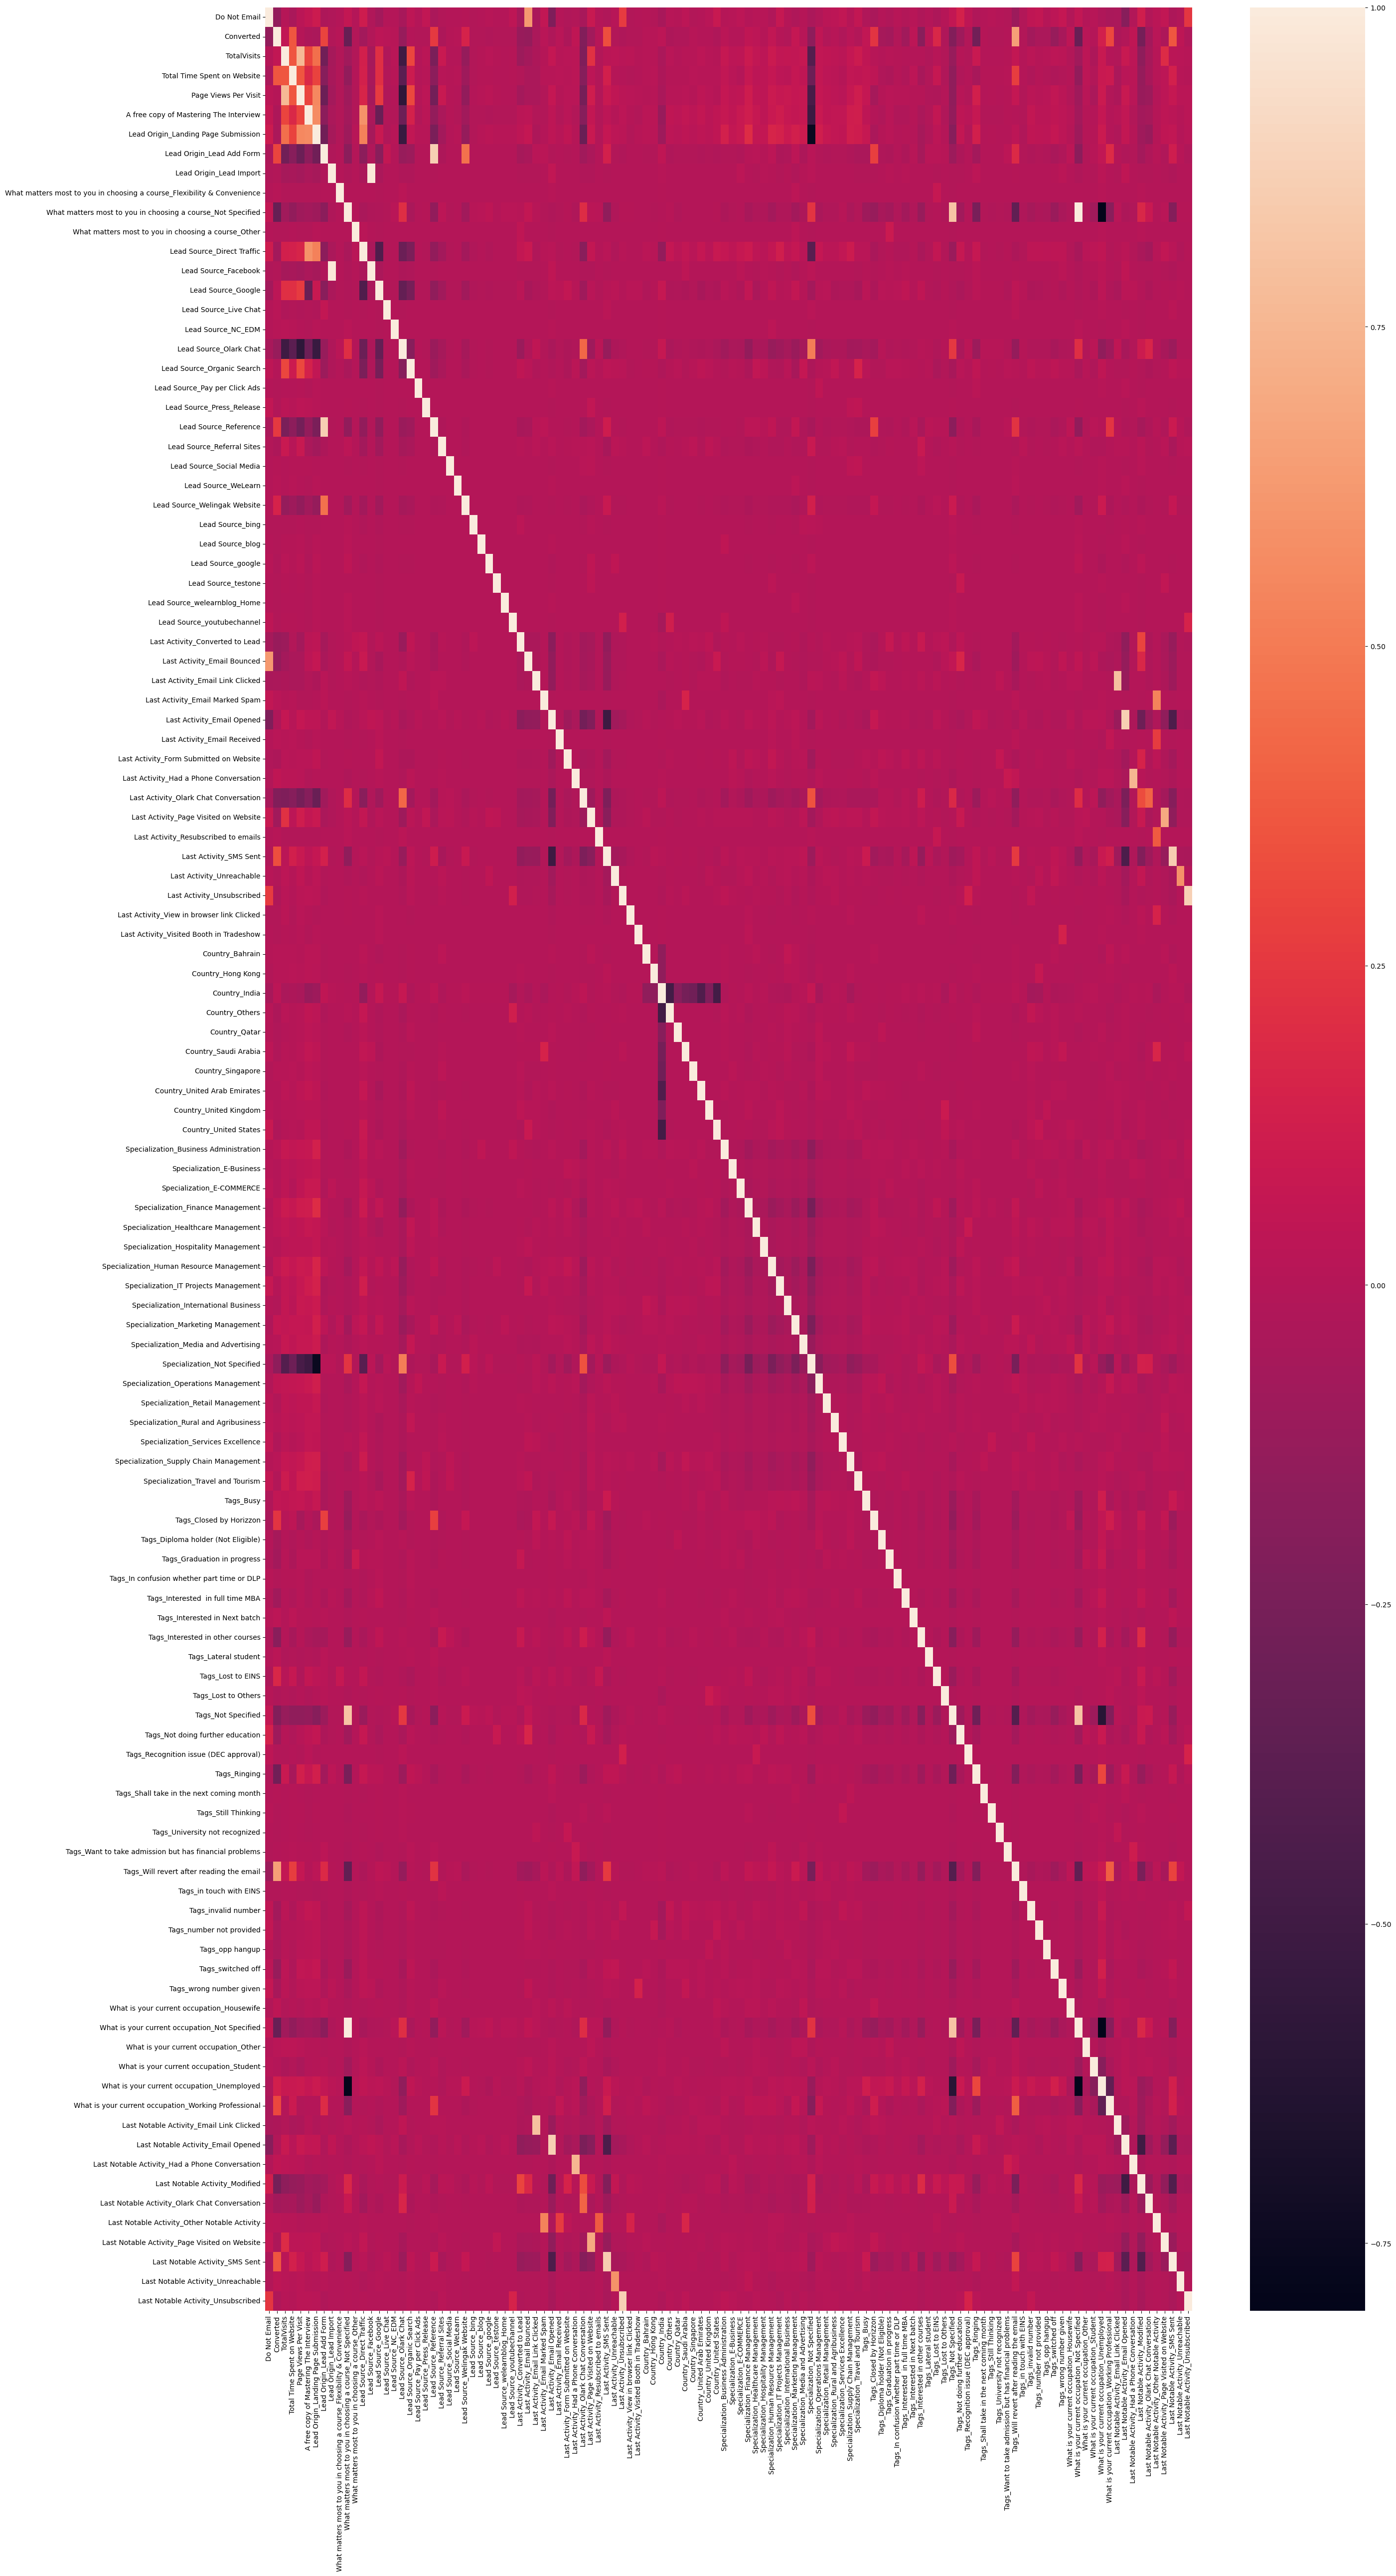

In [126]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,60))        # Size of the figure
sns.heatmap(leads.corr())
plt.show()

<h1 style="color:green;"> Step 8: Model Building

<h2 style="color:blue;"> First Training Model

##### By using stats model

In [127]:
# Importing the statsmodels library with the alias 'sm'
import statsmodels.api as sm

In [128]:
# Losgistic Regression Model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6235
Model Family:                Binomial   Df Model:                          115
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Mar 2024   Deviance:                       39052.
Time:                        16:15:33   Pearson chi2:                 1.91e+18
No. Iterations:                    28   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    3.284e+15   8.05e+07   4.08e+07      0.000    3.28e+15    3.28e+15
Do Not Email                                                            -5.809e+14   4.48e+06   -1.3e+08      0.000   -5.81e+14   -5.81e+14
TotalVisits                                                              1.307e+14   1.45e+06   9.02e+07      0.000    1.31e+14    1.31e+14
Total Time Spent on Website                                              5.161e+14   1.04e+06   4.96e+08      0.000    5.16e+14    5.16e+14
Page Views Per Visit                                                    -7.314e+13   1.59e+06   -4.6e+07      0.000   -7.31e+13   -7.31e+13
A free copy of Mastering The Interview                                   -4.13e+14   2.71e+06  -1.52e+08      0.000   -4.13e+14   -4.13e+14
Lead Origin_Landing Page Submission                                     -3.351e+13   3.44e+06  -9.75e+06      0.000   -3.35e+13   -3.35e+13
Lead Origin_Lead Add Form                                               -1.314e+15   4.77e+07  -2.76e+07      0.000   -1.31e+15   -1.31e+15
Lead Origin_Lead Import                                                  7.241e+15   7.25e+07   9.98e+07      0.000    7.24e+15    7.24e+15
What matters most to you in choosing a course_Flexibility & Convenience   -45.3493   6.48e-07     -7e+07      0.000     -45.349     -45.349
What matters most to you in choosing a course_Not Specified             -3.079e+15   1.93e+07  -1.59e+08      0.000   -3.08e+15   -3.08e+15
What matters most to you in choosing a course_Other                     -3.098e+15   6.78e+07  -4.57e+07      0.000    -3.1e+15    -3.1e+15
Lead Source_Direct Traffic                                              -1.903e+15   6.28e+07  -3.03e+07      0.000    -1.9e+15    -1.9e+15
Lead Source_Facebook                                                    -8.743e+15   9.49e+07  -9.22e+07      0.000   -8.74e+15   -8.74e+15
Lead Source_Google                                                      -1.864e+15   6.27e+07  -2.97e+07      0.000   -1.86e+15   -1.86e+15
Lead Source_Live Chat                                                    2.364e+15   6.25e+07   3.78e+07      0.000    2.36e+15    2.36e+15
Lead Source_NC_EDM                                                       2.996e+15   9.19e+07   3.26e+07      0.000       3e+15       3e+15
Lead Source_Olark Chat                                                  -1.582e+15   6.26e+07  -2.53e+07      0.000   -1.58e+15   -1.58e+15
Lead Source_Organic Search                                              -1.902e+15   6.28e+07  -3.03e+07      0.000    -1.9e+15    -1.9e+15
Lea

### Feature Selection Using RFE

In [129]:
#Importing the LogisticRegression class from the sklearn.linear_model module
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg = LogisticRegression()

In [130]:
# Importing the Recursive Feature Elimination (RFE) class from the sklearn.feature_selection module
from sklearn.feature_selection import RFE

# Specify the number of features to select
num_features_to_select = 15

# Create the RFE model and select 'num_features_to_select' features
rfe = RFE(estimator=logreg, n_features_to_select=num_features_to_select)

# Fit the RFE model to the data
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [131]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False,  True, False,  True, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False])

In [132]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 45),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 44),
 ('A free copy of Mastering The Interview', False, 43),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Origin_Lead Import', False, 89),
 ('What matters most to you in choosing a course_Flexibility & Convenience',
  False,
  102),
 ('What matters most to you in choosing a course_Not Specified', True, 1),
 ('What matters most to you in choosing a course_Other', False, 93),
 ('Lead Source_Direct Traffic', False, 37),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 39),
 ('Lead Source_Live Chat', False, 98),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Pay per Click Ads', False, 100),
 ('Lead Source_Press_Release', False, 90),
 ('Lead Source_Reference', False, 94),
 ('Lead Source_Referral S

In [133]:
col1 = X_train.columns[rfe.support_]
col1

Index(['Do Not Email',
       'What matters most to you in choosing a course_Not Specified',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified'],
      dtype='object')

In [134]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other',
       'Lead Source_Direct Traffic',
       ...
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other Notable Activity',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object', length=102)

<h2 style="color:blue;"> Second Model

In [135]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1182.5
Date:                Mon, 18 Mar 2024   Deviance:                       2365.0
Time:                        16:16:07   Pearson chi2:                 1.32e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6174
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -3.1206      0.194    -16.119      0.000      -3.500      -2.741
Do Not Email                                                   -1.4510      0.264     -5.501      0.000      -1.968      -0.934
What matters most to you in choosing a course_Not Specified    -2.6454      0.151    -17.473      0.000      -2.942      -2.349
Lead Source_Welingak Website                                    2.5890      0.744      3.479      0.001       1.130       4.048
Last Activity_SMS Sent                                          2.3307      0.126     18.538      0.000       2.084       2.577
Tags_Busy                                                       2.1512      0.291      7.388      0.000       1.581       2.722
Tags_Closed by Horizzon                                         8.7537      0.741     11.817      0.000       7.302      10.206
Tags_Interested in Next batch                                  25.8963   6.37e+04      0.000      1.000   -1.25e+05    1.25e+05
Tags_Lost to EINS                                               9.6678      0.795     12.163      0.000       8.110      11.226
Tags_Not Specified                                              3.6513      0.224     16.291      0.000       3.212       4.091
Tags_Ringing                                                   -1.8399      0.307     -5.994      0.000      -2.442      -1.238
Tags_Will revert after reading the email                        6.6729      0.259     25.792      0.000       6.166       7.180
Tags_invalid number                                           -22.4394   1.51e+04     -0.001      0.999   -2.96e+04    2.96e+04
Tags_switched off                                              -1.8633      0.554     -3.364      0.001      -2.949      -0.778
Tags_wrong number given                                       -22.3139   2.08e+04     -0.001      0.999   -4.07e+04    4.07e+04
Last Notable Activity_Modified                                 -1.5439      0.130    -11.831      0.000      -1.800      -1.288
===============================================================================================================================
"""

Dropping the variable `Tags_wrong number given`.

In [136]:
col2 = col1.drop('Tags_wrong number given')

In [137]:
col2

Index(['Do Not Email',
       'What matters most to you in choosing a course_Not Specified',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Modified'],
      dtype='object')

<h2 style="color:blue;"> Third Model

In [138]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1185.9
Date:                Mon, 18 Mar 2024   Deviance:                       2371.8
Time:                        16:16:08   Pearson chi2:                 1.30e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6170
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -3.2189      0.195    -16.535      0.000      -3.600      -2.837
Do Not Email                                                   -1.4593      0.262     -5.560      0.000      -1.974      -0.945
What matters most to you in choosing a course_Not Specified    -2.6383      0.151    -17.481      0.000      -2.934      -2.342
Lead Source_Welingak Website                                    2.5920      0.744      3.484      0.000       1.134       4.050
Last Activity_SMS Sent                                          2.3045      0.125     18.469      0.000       2.060       2.549
Tags_Busy                                                       2.2651      0.290      7.816      0.000       1.697       2.833
Tags_Closed by Horizzon                                         8.8423      0.741     11.928      0.000       7.389      10.295
Tags_Interested in Next batch                                  26.0248   6.36e+04      0.000      1.000   -1.25e+05    1.25e+05
Tags_Lost to EINS                                               9.7531      0.795     12.264      0.000       8.194      11.312
Tags_Not Specified                                              3.7519      0.225     16.703      0.000       3.312       4.192
Tags_Ringing                                                   -1.7194      0.305     -5.631      0.000      -2.318      -1.121
Tags_Will revert after reading the email                        6.7688      0.260     26.074      0.000       6.260       7.278
Tags_invalid number                                           -22.3202   1.51e+04     -0.001      0.999   -2.97e+04    2.96e+04
Tags_switched off                                              -1.7415      0.553     -3.150      0.002      -2.825      -0.658
Last Notable Activity_Modified                                 -1.5317      0.130    -11.756      0.000      -1.787      -1.276
===============================================================================================================================
"""

Dropping the variable `Tags_invalid number`

In [139]:
col3 = col2.drop('Tags_invalid number')

In [140]:
col3

Index(['Do Not Email',
       'What matters most to you in choosing a course_Not Specified',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified'],
      dtype='object')

<h2 style="color:blue;"> Fourth Model

In [141]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1192.1
Date:                Mon, 18 Mar 2024   Deviance:                       2384.2
Time:                        16:16:09   Pearson chi2:                 1.27e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.6162
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -3.4002      0.196    -17.323      0.000      -3.785      -3.015
Do Not Email                                                   -1.4528      0.262     -5.555      0.000      -1.965      -0.940
What matters most to you in choosing a course_Not Specified    -2.6267      0.150    -17.498      0.000      -2.921      -2.333
Lead Source_Welingak Website                                    2.5939      0.743      3.490      0.000       1.137       4.051
Last Activity_SMS Sent                                          2.2627      0.123     18.334      0.000       2.021       2.505
Tags_Busy                                                       2.4694      0.288      8.582      0.000       1.905       3.033
Tags_Closed by Horizzon                                         9.0027      0.742     12.128      0.000       7.548      10.458
Tags_Interested in Next batch                                  23.2446   1.42e+04      0.002      0.999   -2.78e+04    2.79e+04
Tags_Lost to EINS                                               9.9039      0.795     12.451      0.000       8.345      11.463
Tags_Not Specified                                              3.9341      0.226     17.439      0.000       3.492       4.376
Tags_Ringing                                                   -1.5037      0.303     -4.967      0.000      -2.097      -0.910
Tags_Will revert after reading the email                        6.9423      0.261     26.570      0.000       6.430       7.454
Tags_switched off                                              -1.5242      0.551     -2.765      0.006      -2.605      -0.444
Last Notable Activity_Modified                                 -1.5057      0.130    -11.577      0.000      -1.761      -1.251
===============================================================================================================================
"""

Dropping the variable `Tags_Interested in Next batch`

In [142]:
col4 = col3.drop('Tags_Interested in Next batch')

In [143]:
col4

Index(['Do Not Email',
       'What matters most to you in choosing a course_Not Specified',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_Modified'],
      dtype='object')

<h2 style="color:blue;"> Fifth Model

In [144]:
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1198.8
Date:                Mon, 18 Mar 2024   Deviance:                       2397.6
Time:                        16:16:09   Pearson chi2:                 1.28e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6154
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -3.3048      0.188    -17.619      0.000      -3.672      -2.937
Do Not Email                                                   -1.4043      0.258     -5.438      0.000      -1.910      -0.898
What matters most to you in choosing a course_Not Specified    -2.6317      0.150    -17.493      0.000      -2.927      -2.337
Lead Source_Welingak Website                                    2.5862      0.743      3.479      0.001       1.129       4.043
Last Activity_SMS Sent                                          2.2890      0.123     18.589      0.000       2.048       2.530
Tags_Busy                                                       2.3576      0.282      8.356      0.000       1.805       2.911
Tags_Closed by Horizzon                                         8.9198      0.740     12.050      0.000       7.469      10.371
Tags_Lost to EINS                                               9.8134      0.792     12.388      0.000       8.261      11.366
Tags_Not Specified                                              3.8341      0.218     17.577      0.000       3.407       4.262
Tags_Ringing                                                   -1.6222      0.297     -5.464      0.000      -2.204      -1.040
Tags_Will revert after reading the email                        6.8482      0.255     26.856      0.000       6.348       7.348
Tags_switched off                                              -1.6455      0.548     -3.003      0.003      -2.720      -0.571
Last Notable Activity_Modified                                 -1.5218      0.130    -11.721      0.000      -1.776      -1.267
===============================================================================================================================
"""

Dropping the variable `Tags_switched off`

In [145]:
col5 = col4.drop('Tags_switched off')

In [146]:
col5

Index(['Do Not Email',
       'What matters most to you in choosing a course_Not Specified',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

<h2 style="color:blue;"> Sixth Model

In [147]:
X_train_sm = sm.add_constant(X_train[col5])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1205.1
Date:                Mon, 18 Mar 2024   Deviance:                       2410.2
Time:                        16:16:10   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6146
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -3.6008      0.183    -19.683      0.000      -3.959      -3.242
Do Not Email                                                   -1.4083      0.256     -5.495      0.000      -1.911      -0.906
What matters most to you in choosing a course_Not Specified    -2.6160      0.149    -17.514      0.000      -2.909      -2.323
Lead Source_Welingak Website                                    2.5907      0.743      3.489      0.000       1.135       4.046
Last Activity_SMS Sent                                          2.2295      0.122     18.345      0.000       1.991       2.468
Tags_Busy                                                       2.6871      0.274      9.821      0.000       2.151       3.223
Tags_Closed by Horizzon                                         9.1874      0.740     12.414      0.000       7.737      10.638
Tags_Lost to EINS                                              10.0710      0.791     12.724      0.000       8.520      11.622
Tags_Not Specified                                              4.1328      0.213     19.380      0.000       3.715       4.551
Tags_Ringing                                                   -1.2770      0.288     -4.439      0.000      -1.841      -0.713
Tags_Will revert after reading the email                        7.1348      0.252     28.277      0.000       6.640       7.629
Last Notable Activity_Modified                                 -1.4863      0.130    -11.466      0.000      -1.740      -1.232
===============================================================================================================================
"""

The p-value for the selected features in RFE is well below 0.05. Therefore checking this model for VIFs.

### Checking Variance Inflation Factor (VIFs)

In [148]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7                                  Tags_Not Specified  5.16
1   What matters most to you in choosing a course_...  4.91
3                              Last Activity_SMS Sent  1.62
10                     Last Notable Activity_Modified  1.43
9            Tags_Will revert after reading the email  1.35
2                        Lead Source_Welingak Website  1.14
8                                        Tags_Ringing  1.12
0                                        Do Not Email  1.10
5                             Tags_Closed by Horizzon  1.05
6                                   Tags_Lost to EINS  1.05
4                                           Tags_Busy  1.04

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Tags_Not Specified	' has the highest VIF. So let's start by dropping that.

In [150]:
col6 = col5.drop('Tags_Not Specified', 1)
col6

Index(['Do Not Email',
       'What matters most to you in choosing a course_Not Specified',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

<h2 style="color:blue;"> Seventh Model

In [151]:
X_train_sm = sm.add_constant(X_train[col6])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1485.2
Date:                Mon, 18 Mar 2024   Deviance:                       2970.3
Time:                        16:16:10   Pearson chi2:                 8.89e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5791
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -1.4853      0.085    -17.566      0.000      -1.651      -1.320
Do Not Email                                                   -1.4612      0.237     -6.176      0.000      -1.925      -0.997
What matters most to you in choosing a course_Not Specified    -0.4820      0.107     -4.518      0.000      -0.691      -0.273
Lead Source_Welingak Website                                    4.7184      0.740      6.380      0.000       3.269       6.168
Last Activity_SMS Sent                                          2.0792      0.102     20.327      0.000       1.879       2.280
Tags_Busy                                                       0.7085      0.228      3.114      0.002       0.263       1.155
Tags_Closed by Horizzon                                         7.2642      0.722     10.067      0.000       5.850       8.678
Tags_Lost to EINS                                               6.7890      0.733      9.266      0.000       5.353       8.225
Tags_Ringing                                                   -3.2574      0.246    -13.240      0.000      -3.740      -2.775
Tags_Will revert after reading the email                        5.1465      0.196     26.309      0.000       4.763       5.530
Last Notable Activity_Modified                                 -1.7160      0.119    -14.363      0.000      -1.950      -1.482
===============================================================================================================================
"""

##### Let's now check the VIFs again

In [152]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                             Last Activity_SMS Sent  1.54
9                     Last Notable Activity_Modified  1.42
1  What matters most to you in choosing a course_...  1.34
8           Tags_Will revert after reading the email  1.33
7                                       Tags_Ringing  1.11
0                                       Do Not Email  1.10
5                            Tags_Closed by Horizzon  1.05
4                                          Tags_Busy  1.04
2                       Lead Source_Welingak Website  1.03
6                                  Tags_Lost to EINS  1.02

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

<h1 style="color:green;"> STEP - 9 : Value Prediction & Evaluation

In [153]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.122681
1012    0.031418
9226    0.012376
4750    0.527945
7987    0.996553
1281    0.996797
2880    0.122681
4971    0.786243
7536    0.974942
1248    0.012376
dtype: float64

In [154]:
# Reshaping the predictions for the training set to ensure compatibility with other operations or data structures
y_train_pred = y_train_pred.values.reshape(-1)

# Displaying the first 10 reshaped predicted values for the training set
y_train_pred[:10]

array([0.12268053, 0.03141756, 0.01237636, 0.527945  , 0.99655338,
       0.9967967 , 0.12268053, 0.78624345, 0.97494188, 0.01237636])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [155]:
# Creating a DataFrame 'y_train_pred_final' containing actual 'Converted' values from the training set and predicted probabilities 'Converted_Prob'
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})

# Adding 'Prospect ID' column to 'y_train_pred_final', containing the index values from the training set
y_train_pred_final['Prospect ID'] = y_train.index

# Displaying the first few rows of the DataFrame 'y_train_pred_final'
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.122681         3009
1          0        0.031418         1012
2          0        0.012376         9226
3          1        0.527945         4750
4          1        0.996553         7987

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [156]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Assigning lead scores by mapping the predicted conversion probabilities multiplied by 100 and rounding them to the nearest int
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map(lambda x: round(x * 100))


# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  Lead_Score
0          0        0.122681         3009          0          12
1          0        0.031418         1012          0           3
2          0        0.012376         9226          0           1
3          1        0.527945         4750          1          53
4          1        0.996553         7987          1         100

### <i>Evaluating the Model

In [157]:
#Importing the metrics module from the sklearn library to evaluate the performance of machine learning models
from sklearn import metrics

In [158]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3687  218]
 [ 323 2123]]


In [159]:
# Predicted     not_churn    churn
# Actual
# not_churn        3687      218
# churn            323       2123 

In [160]:
# Let's check the overall accuracy.
print('Accuracy is ',round(100 * metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),2))

Accuracy is  91.48


### <i> Metrics beyond simply accuracy

In [161]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model
print("The sensitivity is ",round(100 * (TP / float(TP+FN)),2))

The sensitivity is  86.79


In [163]:
# Let us calculate specificity
print("The specificity is ",round(100 * (TN / float(TN+FP)),2))

The specificity is  94.42


In [164]:
# Calculate false postive rate - predicting converted when customer has not converted
print("The false postive rate is ",round(100 * (FP/ float(TN+FP)),2))

The false postive rate is  5.58


In [165]:
# Positive predictive value 
print ("Positive predictive value is ", round(100 *(TP / float(TP+FP)),2))

Positive predictive value is  90.69


In [166]:
# Negative predictive value
print ("Negative predictive value is ", round(100 *(TN / float(TN+ FN)),2))

Negative predictive value is  91.95


<h1 style="color:green;"> Step 10: Plotting the ROC Curve

In [167]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [168]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

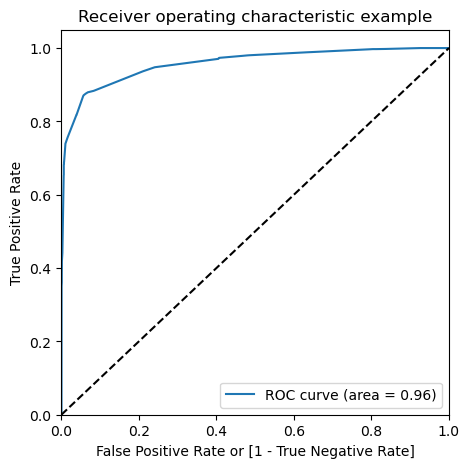

In [169]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

<h1 style="color:green;"> Step 11: Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [170]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  Lead_Score  0.0  0.1  \
0          0        0.122681         3009          0          12    1    1   
1          0        0.031418         1012          0           3    1    0   
2          0        0.012376         9226          0           1    1    0   
3          1        0.527945         4750          1          53    1    1   
4          1        0.996553         7987          1         100    1    1   

   0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0  
3    1    1    1    1    0    0    0    0  
4    1    1    1    1    1    1    1    1

In [171]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.739569  0.970564  0.594878
0.2   0.2  0.903165  0.883892  0.915237
0.3   0.3  0.913557  0.875715  0.937260
0.4   0.4  0.914974  0.868765  0.943918
0.5   0.5  0.914817  0.867948  0.944174
0.6   0.6  0.905842  0.818070  0.960819
0.7   0.7  0.896237  0.755928  0.984123
0.8   0.8  0.893088  0.738757  0.989757
0.9   0.9  0.876083  0.688880  0.993342


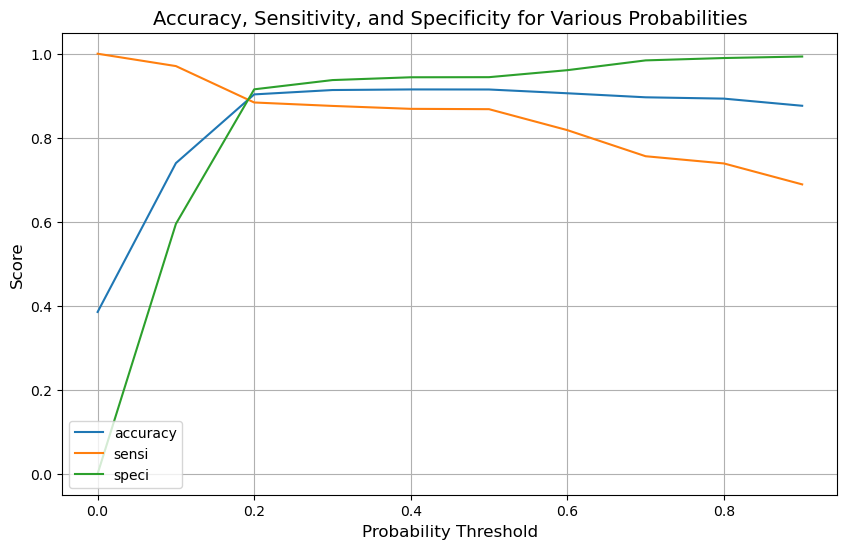

In [172]:
# Plot accuracy, sensitivity, and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'],  figsize=(10, 6))
plt.xlabel('Probability Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Accuracy, Sensitivity, and Specificity for Various Probabilities', fontsize=14)
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

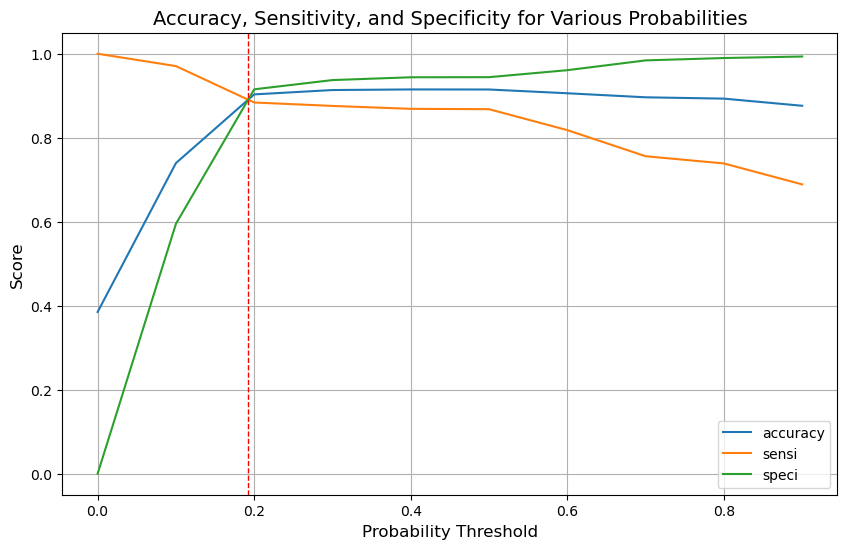

In [173]:
# Plot accuracy, sensitivity, and specificity for various probabilities with cut-off line
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'], figsize=(10, 6))
plt.xlabel('Probability Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Accuracy, Sensitivity, and Specificity for Various Probabilities', fontsize=14)
plt.grid(True)
plt.legend(loc='lower right')

# Plot the cut-off line at the threshold of 0.192
plt.axvline(x=0.192, color='r', linestyle='--', linewidth=1)

plt.show()

<h3 style="color:brown;"> From the curve above, 0.192 is the optimum point to take it as a cutoff probability.

In [174]:
# Creating a new column 'final_predicted' in the DataFrame y_train_pred_final
# Using the map() function, a lambda function is applied to each value in the 'Converted_Prob' column
# If the value of 'Converted_Prob' is greater than 0.27, the corresponding value in 'final_predicted' is set to 1 
# Otherwise, it is set to 0

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.192 else 0) 

# Calculate the lead score based on the 'Converted_prob' column
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map(lambda x: round(x * 100))

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  Lead_Score  0.0  0.1  \
0          0        0.122681         3009          0          12    1    1   
1          0        0.031418         1012          0           3    1    0   
2          0        0.012376         9226          0           1    1    0   
3          1        0.527945         4750          1          53    1    1   
4          1        0.996553         7987          1         100    1    1   

   0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0    0    0                0  
2    0    0    0    0    0    0    0    0                0  
3    1    1    1    1    0    0    0    0                1  
4    1    1    1    1    1    1    1    1                1

In [175]:
# Let's check the overall accuracy.
print('Overall Accuracy: ',round(100 * (metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)),2))

Overall Accuracy:  90.32


In [176]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3574,  331],
       [ 284, 2162]], dtype=int64)

In [177]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [178]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity is ',round(100 *(TP / float(TP+FN)),2))

Sensitivity is  88.39


In [179]:
# Let us calculate specificity
print('Specificity is ', round( 100 * (TN / float(TN+FP)),2))

Specificity is  91.52



**Observation:**



So as we can see above the model seems to be performing well. The ROC curve has a value of 0.192, which is very good. We have the following values for the Train Data:

- Accuracy : 90.32%
- Sensitivity : 88.39%
- Specificity : 91.52% <br>



Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [180]:
# Calculate false postive rate - predicting converted when customer does not convert
print('False Postive Rate is ', round(100 * (FP/ float(TN+FP)),2))

False Postive Rate is  8.48


In [181]:
# Positive predictive value 
print ('Positive predictive value is ', round(100 * (TP / float(TP+FP)),2))

Positive predictive value is  86.72


In [182]:
# Negative predictive value
print ('Negative predictive value is ', round(100 * (TN / float(TN+ FN)),2))

Negative predictive value is  92.64


## Precision and Recall

In [183]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3574,  331],
       [ 284, 2162]], dtype=int64)

##### Precision
TP / TP + FP

In [184]:
print('Precision is',round(100 * (confusion[1,1]/(confusion[0,1]+confusion[1,1])),2))

Precision is 86.72


##### Recall
TP / TP + FN

In [185]:
print('Recall is',round(100 * (confusion[1,1]/(confusion[1,0]+confusion[1,1])),2))

Recall is 88.39


#### Using sklearn utilities for the same

In [186]:
#Importing the precision_score and recall_score functions from the sklearn.metrics module
from sklearn.metrics import precision_score, recall_score

In [187]:
print('Precision is',round(100 * (precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)),2))

Precision is 86.72


In [188]:
print('Recall is',round(100 * (recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)),2))

Recall is 88.39


##### F1- score

In [189]:
from sklearn.metrics import f1_score

# y_true contains the true labels and y_pred contains the predicted labels
f1 = f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

print("F1 Score:", round((100 * f1),2))

F1 Score: 87.55


<h3 style="color:brown;"> With the current cut off as 0.192, the accuracy is 90.32%, sensitivity is 88.39% and specificity is  91.52%

### Precision and recall tradeoff

In [190]:
from sklearn.metrics import precision_recall_curve

In [191]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [192]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

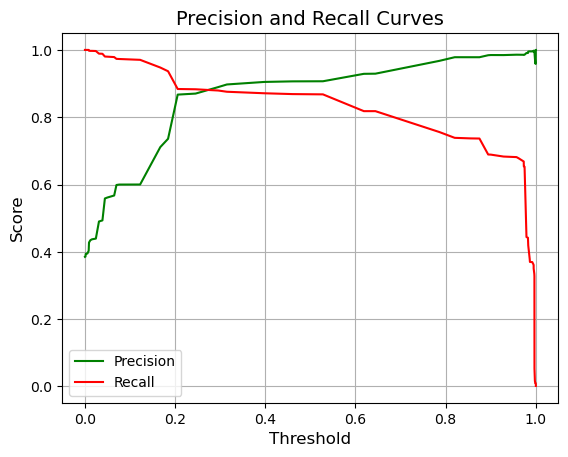

In [193]:
plt.plot(thresholds, p[:-1], "g-", label="Precision") 
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Precision and Recall Curves', fontsize=14)
plt.grid(True)
plt.legend(loc='lower left')
plt.show()



The threshold value of Sestivity-Specificity model (0.192) will be considered for making predictions on the Test set.

<h1 style="color:green;">Step 12: Making predictions on the test set

In [194]:
#Scaling the required variables
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [195]:
# Selecting only the final model column 'col6' from the train dataset to test the model
X_test = X_test[col6]

# Displaying the first few rows of the modified test dataset
X_test.head()

Do Not Email  \
3271             0   
1490             0   
7936             0   
4216             0   
3830             0   

      What matters most to you in choosing a course_Not Specified  \
3271                                                  1             
1490                                                  0             
7936                                                  1             
4216                                                  0             
3830                                                  1             

      Lead Source_Welingak Website  Last Activity_SMS Sent  Tags_Busy  \
3271                             0                       0          0   
1490                             0                       0          0   
7936                             0                       0          0   
4216                             0                       0          0   
3830                             0                       0          0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
3271                        0                  0             0   
1490                        0                  0             0   
7936                        0                  0             0   
4216                        1                  0             0   
3830                        0                  0             0   

      Tags_Will revert after reading the email  Last Notable Activity_Modified  
3271                                         0                               0  
1490                                         1                               0  
7936                                         0                               0  
4216                                         0                               1  
3830                                         0                               0

In [196]:
# Adding a constant column (intercept) to the test dataset using the statsmodels library
X_test_sm = sm.add_constant(X_test)

# This constant column is typically added when using statsmodels for regression analysis

#### Making predictions on the test set

In [197]:
# Predicting the target variable (y) values using the fitted model 'res' and the test dataset with the constant added
y_test_pred = res.predict(X_test_sm)

# This generates predictions for the target variable based on the features in the test dataset

In [198]:
# Displaying the first 10 predicted values of the target variable from the test dataset
y_test_pred[:10]

3271    0.122681
1490    0.974942
7936    0.122681
4216    0.983092
3830    0.122681
1800    0.974942
6507    0.065162
4821    0.184629
4223    0.996797
4714    0.167407
dtype: float64

In [199]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [200]:
# Let's see the head
y_pred_1.head()

0
3271  0.122681
1490  0.974942
7936  0.122681
4216  0.983092
3830  0.122681

In [201]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [202]:
# Putting LeadID to index
y_test_df['Prospect ID'] = y_test_df.index

In [203]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [204]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [205]:
# Let's see the final head
y_pred_final.head()

Converted  Prospect ID         0
0          0         3271  0.122681
1          1         1490  0.974942
2          0         7936  0.122681
3          1         4216  0.983092
4          0         3830  0.122681

In [206]:
# Rename the '0' column to 'Converted_Prob'
y_pred_final.rename(columns={0: 'Converted_Prob'}, inplace=True)

# Re-arrange the columns
y_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Converted_Prob']]

# Let's see the head of y_pred_final again
print(y_pred_final.head())

   Prospect ID  Converted  Converted_Prob
0         3271          0        0.122681
1         1490          1        0.974942
2         7936          0        0.122681
3         4216          1        0.983092
4         3830          0        0.122681


In [207]:
# Creating a new column 'final_predicted' in the DataFrame 'y_pred_final' based on the 'Converted_Prob' column
# If the value in 'Converted_Prob' is greater than 0.27, it is mapped to 1, otherwise to 0

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.192 else 0)

# This operation assigns a binary label (1 or 0) to each observation based on the probability threshold of 0.192

In [208]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         3271          0        0.122681                0
1         1490          1        0.974942                1
2         7936          0        0.122681                0
3         4216          1        0.983092                1
4         3830          0        0.122681                0

In [209]:
# Let's check the overall accuracy.
print('The overall Accuracy is', round(100 * (metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)),2))

The overall Accuracy is 89.94


In [210]:
# Creating the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1584,  150],
       [ 124,  865]], dtype=int64)

In [211]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [212]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity is ',round(100 * (TP / float(TP+FN)),2))

Sensitivity is  87.46


In [213]:
# Let us calculate specificity
print('Specificity is ',round(100 * (TN / float(TN+FP)),2))

Specificity is  91.35


<h3 style="color:brown;"> With the current cut off as 0.192, the accuracy is 89.94%, sensitivity is 87.46% and specificity is 91.35%

<h1 style="color:green;">FINAL OBSERVATIONS AND CONCLUSIONS

Comparing the values obtained for TRAIN data and TEST data:

### TRAIN DATA:
> - <b>Accuracy:</b>  90.32% <br>
> - <b>Sensitivity:</b>  88.39%
> - <b>Specificity:</b> 91.52%

### TEST DATA:
> - <b>Accuracy:</b>  89.94% <br>
> - <b>Sensitivity:</b>  87.46%
> - <b>Specificity:</b> 91.35%


The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model.

The top variables in the model which contribute most towards the probability of a lead getting converted

In [214]:
# Sorting the model parameters (coefficients) in descending order
res.params.sort_values(ascending=False)

Tags_Closed by Horizzon                                        7.264222
Tags_Lost to EINS                                              6.789036
Tags_Will revert after reading the email                       5.146474
Lead Source_Welingak Website                                   4.718402
Last Activity_SMS Sent                                         2.079184
Tags_Busy                                                      0.708539
What matters most to you in choosing a course_Not Specified   -0.481993
Do Not Email                                                  -1.461179
const                                                         -1.485294
Last Notable Activity_Modified                                -1.716016
Tags_Ringing                                                  -3.257387
dtype: float64